In [632]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import folium
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from datetime import datetime, timedelta
import contextily as cx
import geopandas as gpd
from shapely.geometry import Point

In [633]:
df_merged = pd.read_csv(r"C:\Users\emili\sp-ml-17-final-project-g3\data\processed\df_merged.csv")
df_merged

C:\Users\emili\AppData\Local\Temp\ipykernel_29768\3520484777.py:1: DtypeWarning: Columns (4,11,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(r"C:\Users\emili\sp-ml-17-final-project-g3\data\processed\df_merged.csv")


,Unnamed: 0.1,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,...,Unnamed: 0,time,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,Festivo,dia_festivo
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2017-01-01T00:00,7.2,0.0,0.0,7.1,0.0,0,NaN,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2017-01-01T01:00,7.0,0.0,0.0,8.9,0.0,0,NaN,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2017-01-01T02:00,4.2,0.0,0.0,11.0,0.0,0,NaN,0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2017-01-01T03:00,4.7,0.0,0.0,10.8,0.0,0,NaN,0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2017-01-01T04:00,4.4,0.0,0.0,10.5,0.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722160,722160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,701275,2024-12-31T19:00,9.1,0.0,0.0,1.1,0.0,0,NaN,0
722161,722161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,701276,2024-12-31T20:00,9.0,0.0,0.0,3.4,0.0,0,NaN,0
722162,722162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,701277,2024-12-31T21:00,8.4,0.0,0.0,6.6,0.0,0,NaN,0
722163,722163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,701278,2024-12-31T22:00,7.8,0.0,0.0,8.1,0.0,0,NaN,0


In [634]:
df_merged_accident = df_merged[df_merged["accident"]==1]

In [635]:
df_merged_accident

,Unnamed: 0.1,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,...,Unnamed: 0,time,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,Festivo,dia_festivo
11,11,2017S000006,1.0,Ciutat Vella,1.0,el Raval,352100.0,TALLERS ...,0004 0004,Diumenge,...,11,2017-01-01T11:00,5.1,0.0,0.0,13.0,0.0,1,NaN,0
43,43,2017S000035,1.0,Ciutat Vella,2.0,el Barri Gòtic,63408.0,RDA LITORAL(BESÒS) ...,0001 0001,Dilluns,...,43,2017-01-02T19:00,9.2,0.0,0.0,6.7,0.0,1,NaN,0
59,59,2017S000047,1.0,Ciutat Vella,2.0,el Barri Gòtic,144204.0,PG COLOM ...,0046 0046,Dimarts,...,59,2017-01-03T11:00,4.8,0.0,0.0,11.3,0.0,1,NaN,0
82,82,2017S000069,1.0,Ciutat Vella,1.0,el Raval,701367.0,SANT RAFAEL ...,0043 0043,Dimecres,...,82,2017-01-04T10:00,6.0,0.0,0.0,10.2,0.0,1,NaN,0
143,143,2017S000138,1.0,Ciutat Vella,3.0,la Barceloneta,27700.0,SALVADOR ESPRIU ...,0023 0025,Divendres,...,143,2017-01-06T23:00,4.3,0.0,0.0,7.6,0.0,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722078,722078,2024S007496,9.0,Sant Andreu,62.0,el Congrés i els Indians,121402.0,Felip II,NaN,Dissabte,...,701193,2024-12-28T09:00,1.6,0.0,0.0,9.9,0.0,1,NaN,0
722081,722081,2024S007491,9.0,Sant Andreu,63.0,Navas,209900.0,Meridiana,239-241,Dissabte,...,701196,2024-12-28T12:00,8.7,0.0,0.0,7.5,0.0,1,NaN,0
722125,722125,2024S007511,9.0,Sant Andreu,63.0,Navas,115603.0,Espronceda,NaN,Dilluns,...,701240,2024-12-30T08:00,0.6,0.0,0.0,9.7,0.0,1,NaN,0
722156,722156,2024S007533,9.0,Sant Andreu,59.0,el Bon Pastor,701266.0,Litoral (Llobregat),K15,Dimarts,...,701271,2024-12-31T15:00,13.3,0.0,0.0,2.5,0.0,1,NaN,0


In [636]:
df_merged_accident.drop(["Mes_any", "Nom_mes", "Dia_mes", "Hora_dia", "Any", "Dia_setmana", "Descripcio_dia_setmana", "Nom_mes", "time", "Festivo", "Unnamed: 0.1", "Codi_districte", "Nom_districte", "Codi_barri", "Nom_barri", "Codi_carrer", "Nom_carrer", "Num_postal", "Descripcio_tipus_dia", "Descripcio_torn", "Unnamed: 0"], axis=1, inplace=True)


C:\Users\emili\AppData\Local\Temp\ipykernel_29768\4203608286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_accident.drop(["Mes_any", "Nom_mes", "Dia_mes", "Hora_dia", "Any", "Dia_setmana", "Descripcio_dia_setmana", "Nom_mes", "time", "Festivo", "Unnamed: 0.1", "Codi_districte", "Nom_districte", "Codi_barri", "Nom_barri", "Codi_carrer", "Nom_carrer", "Num_postal", "Descripcio_tipus_dia", "Descripcio_torn", "Unnamed: 0"], axis=1, inplace=True)


In [637]:
df_merged_accident

,Numero_expedient,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,...,Descripcio_tipus_accident,time_n,location_id,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,dia_festivo
11,2017S000006,0.0,1.0,0.0,1.0,1.0,"430384,25","4582001,59",2.165199,41.385158,...,Atropellament,2017-01-01 11:00:00,0,5.1,0.0,0.0,13.0,0.0,1,0
43,2017S000035,0.0,1.0,0.0,1.0,4.0,"431349,27","4581520,59",2.179477,41.377111,...,Abast multiple,2017-01-02 19:00:00,0,9.2,0.0,0.0,6.7,0.0,1,0
59,2017S000047,0.0,1.0,0.0,1.0,1.0,"431567,82","4581584,78",2.179893,41.378912,...,Atropellament,2017-01-03 11:00:00,0,4.8,0.0,0.0,11.3,0.0,1,0
82,2017S000069,0.0,0.0,0.0,0.0,1.0,"430721,27","4581281,27",2.170289,41.379488,...,Xoc contra element estàtic,2017-01-04 10:00:00,0,6.0,0.0,0.0,10.2,0.0,1,0
143,2017S000138,0.0,1.0,0.0,1.0,2.0,"432320,94","4581548,53",2.195090,41.387723,...,Caiguda (dues rodes),2017-01-06 23:00:00,0,4.3,0.0,0.0,7.6,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722078,2024S007496,NaN,1.0,NaN,1.0,2.0,4586578.624,431540.502,2.179570,41.426006,...,Col.lisió fronto-lateral,2024-12-28 09:00:00,9,1.6,0.0,0.0,9.9,0.0,1,0
722081,2024S007491,NaN,1.0,NaN,1.0,2.0,4585877.335,432122.352,2.186611,41.419739,...,Abast,2024-12-28 12:00:00,9,8.7,0.0,0.0,7.5,0.0,1,0
722125,2024S007511,NaN,1.0,NaN,1.0,2.0,4585756.377,432147.095,2.186921,41.418652,...,Col.lisió lateral,2024-12-30 08:00:00,9,0.6,0.0,0.0,9.7,0.0,1,0
722156,2024S007533,NaN,NaN,1.0,1.0,2.0,4588186.572,433903.245,2.207668,41.440686,...,Abast,2024-12-31 15:00:00,9,13.3,0.0,0.0,2.5,0.0,1,0


In [638]:
df_merged_accident.drop_duplicates()

,Numero_expedient,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,...,Descripcio_tipus_accident,time_n,location_id,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,dia_festivo
11,2017S000006,0.0,1.0,0.0,1.0,1.0,"430384,25","4582001,59",2.165199,41.385158,...,Atropellament,2017-01-01 11:00:00,0,5.1,0.0,0.0,13.0,0.0,1,0
43,2017S000035,0.0,1.0,0.0,1.0,4.0,"431349,27","4581520,59",2.179477,41.377111,...,Abast multiple,2017-01-02 19:00:00,0,9.2,0.0,0.0,6.7,0.0,1,0
59,2017S000047,0.0,1.0,0.0,1.0,1.0,"431567,82","4581584,78",2.179893,41.378912,...,Atropellament,2017-01-03 11:00:00,0,4.8,0.0,0.0,11.3,0.0,1,0
82,2017S000069,0.0,0.0,0.0,0.0,1.0,"430721,27","4581281,27",2.170289,41.379488,...,Xoc contra element estàtic,2017-01-04 10:00:00,0,6.0,0.0,0.0,10.2,0.0,1,0
143,2017S000138,0.0,1.0,0.0,1.0,2.0,"432320,94","4581548,53",2.195090,41.387723,...,Caiguda (dues rodes),2017-01-06 23:00:00,0,4.3,0.0,0.0,7.6,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722078,2024S007496,NaN,1.0,NaN,1.0,2.0,4586578.624,431540.502,2.179570,41.426006,...,Col.lisió fronto-lateral,2024-12-28 09:00:00,9,1.6,0.0,0.0,9.9,0.0,1,0
722081,2024S007491,NaN,1.0,NaN,1.0,2.0,4585877.335,432122.352,2.186611,41.419739,...,Abast,2024-12-28 12:00:00,9,8.7,0.0,0.0,7.5,0.0,1,0
722125,2024S007511,NaN,1.0,NaN,1.0,2.0,4585756.377,432147.095,2.186921,41.418652,...,Col.lisió lateral,2024-12-30 08:00:00,9,0.6,0.0,0.0,9.7,0.0,1,0
722156,2024S007533,NaN,NaN,1.0,1.0,2.0,4588186.572,433903.245,2.207668,41.440686,...,Abast,2024-12-31 15:00:00,9,13.3,0.0,0.0,2.5,0.0,1,0


In [639]:

# Copia de trabajo
acc = df_merged_accident.copy()

# Detecta columnas típicas de lat/lon y renómbralas a 'lat' y 'lon'
candidatos_lat = ["Latitud"]
candidatos_lon = ["Longitud"]

def elegir_col(cols, candidatos):
    for c in candidatos:
        if c in cols: 
            return c
    raise ValueError(f"No encuentro columna en {candidatos}. Renombra tus columnas.")

lat_col = elegir_col(acc.columns, candidatos_lat)
lon_col = elegir_col(acc.columns, candidatos_lon)

acc = acc.rename(columns={lat_col: "lat", lon_col: "lon"})

# A numérico (por si vienen como string) y filtrado de valores imposibles
acc["lat"] = pd.to_numeric(acc["lat"], errors="coerce")
acc["lon"] = pd.to_numeric(acc["lon"], errors="coerce")

# Barcelona aprox: lat 41.27..41.49, lon 2.05..2.23 (amplío un poco por seguridad)
acc = acc[(acc["lat"].between(41.2, 41.6)) & (acc["lon"].between(1.9, 2.4))]

# Quita nulos
acc = acc.dropna(subset=["lat", "lon"]).reset_index(drop=True)

print(acc.shape)  # filas tras limpieza

(68557, 23)


- Escalado de longitud y latitud

In [640]:
from sklearn.preprocessing import StandardScaler

X = acc[["lat", "lon"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [641]:
k = 200

kmeans = MiniBatchKMeans(n_clusters=k, random_state=22, batch_size=2048, n_init="auto")
labels = kmeans.fit_predict(X_scaled)

acc["cluster"] = labels
print(acc["cluster"].nunique())  # clusters obtenidos

200


- Obtén puntos representativos de cada cluster y el conteo de accidentes por cluster.

In [642]:
# Centroides en el espacio escalado → volvemos a lat/lon (si usaste opción A)
cent_scaled = kmeans.cluster_centers_
cent_latlon = scaler.inverse_transform(cent_scaled)
centroids_df = pd.DataFrame(cent_latlon, columns=["cent_lat", "cent_lon"])
centroids_df["cluster"] = range(k)

# Conteo por cluster
cluster_summary = acc.groupby("cluster").size().reset_index(name="n_accidentes")

# Merge centroides + conteo
tramos = centroids_df.merge(cluster_summary, on="cluster", how="left").sort_values("n_accidentes", ascending=False)
tramos.head()


,cent_lat,cent_lon,cluster,n_accidentes
90,41.397368,2.134119,90,765
103,41.394326,2.166976,103,750
98,41.390845,2.161050,98,733
148,41.394095,2.149990,148,721
129,41.390296,2.171452,129,700


- Investigamos un poquito cada cluster, para mirar cantidad de accidentes en cada uno

In [643]:
tramos["n_accidentes"].sort_values(ascending=True)

55      41
76      45
135     46
69      55
96      62
      ... 
129    700
148    721
98     733
103    750
90     765
Name: n_accidentes, Length: 200, dtype: int64

In [644]:
m = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Pinta (muestra) una muestra de accidentes para no saturar
muestra = acc.sample(min(4000, len(acc)), random_state=42)

for _, r in muestra.iterrows():
    folium.CircleMarker(
        location=[r["lat"], r["lon"]],
        radius=2,
        fill=True,
        fill_opacity=0.5,
        tooltip=f"cluster {int(r['cluster'])}"
    ).add_to(m)

# Centroides (los “tramos” representativos)
for _, r in tramos.iterrows():
    folium.Marker(
        [r["cent_lat"], r["cent_lon"]],
        icon=folium.Icon(color="red", icon="info-sign"),
        tooltip=f"Cluster {int(r['cluster'])} | n={int(r['n_accidentes'])}"
    ).add_to(m)

m.save("clusters_accidentes_barcelona.html")
print("Mapa generado: clusters_accidentes_barcelona.html")


Mapa generado: clusters_accidentes_barcelona.html


In [645]:
acc.to_csv("accidentes_con_cluster.csv", index=False)
tramos.to_csv("tramos_clusters.csv", index=False)


In [646]:
df_acc_cluster = pd.read_csv(r"C:\Users\emili\sp-ml-17-final-project-g3\notebooks\accidentes_con_cluster.csv")
df_acc_cluster

,Numero_expedient,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,lon,lat,...,time_n,location_id,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,dia_festivo,cluster
0,2017S000006,0.0,1.0,0.0,1.0,1.0,"430384,25","4582001,59",2.165199,41.385158,...,2017-01-01 11:00:00,0,5.1,0.0,0.0,13.0,0.0,1,0,156
1,2017S000035,0.0,1.0,0.0,1.0,4.0,"431349,27","4581520,59",2.179477,41.377111,...,2017-01-02 19:00:00,0,9.2,0.0,0.0,6.7,0.0,1,0,45
2,2017S000047,0.0,1.0,0.0,1.0,1.0,"431567,82","4581584,78",2.179893,41.378912,...,2017-01-03 11:00:00,0,4.8,0.0,0.0,11.3,0.0,1,0,45
3,2017S000069,0.0,0.0,0.0,0.0,1.0,"430721,27","4581281,27",2.170289,41.379488,...,2017-01-04 10:00:00,0,6.0,0.0,0.0,10.2,0.0,1,0,21
4,2017S000138,0.0,1.0,0.0,1.0,2.0,"432320,94","4581548,53",2.195090,41.387723,...,2017-01-06 23:00:00,0,4.3,0.0,0.0,7.6,0.0,1,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68552,2024S007496,NaN,1.0,NaN,1.0,2.0,4586578.624,431540.502,2.179570,41.426006,...,2024-12-28 09:00:00,9,1.6,0.0,0.0,9.9,0.0,1,0,36
68553,2024S007491,NaN,1.0,NaN,1.0,2.0,4585877.335,432122.352,2.186611,41.419739,...,2024-12-28 12:00:00,9,8.7,0.0,0.0,7.5,0.0,1,0,121
68554,2024S007511,NaN,1.0,NaN,1.0,2.0,4585756.377,432147.095,2.186921,41.418652,...,2024-12-30 08:00:00,9,0.6,0.0,0.0,9.7,0.0,1,0,67
68555,2024S007533,NaN,NaN,1.0,1.0,2.0,4588186.572,433903.245,2.207668,41.440686,...,2024-12-31 15:00:00,9,13.3,0.0,0.0,2.5,0.0,1,0,139


In [647]:
df_acc_cluster["time_n"] = pd.to_datetime(df_acc_cluster["time_n"])

In [648]:
df_acc_cluster["time_n"].dtype

dtype('<M8[ns]')

In [649]:
df_acc_cluster

,Numero_expedient,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,lon,lat,...,time_n,location_id,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,dia_festivo,cluster
0,2017S000006,0.0,1.0,0.0,1.0,1.0,"430384,25","4582001,59",2.165199,41.385158,...,2017-01-01 11:00:00,0,5.1,0.0,0.0,13.0,0.0,1,0,156
1,2017S000035,0.0,1.0,0.0,1.0,4.0,"431349,27","4581520,59",2.179477,41.377111,...,2017-01-02 19:00:00,0,9.2,0.0,0.0,6.7,0.0,1,0,45
2,2017S000047,0.0,1.0,0.0,1.0,1.0,"431567,82","4581584,78",2.179893,41.378912,...,2017-01-03 11:00:00,0,4.8,0.0,0.0,11.3,0.0,1,0,45
3,2017S000069,0.0,0.0,0.0,0.0,1.0,"430721,27","4581281,27",2.170289,41.379488,...,2017-01-04 10:00:00,0,6.0,0.0,0.0,10.2,0.0,1,0,21
4,2017S000138,0.0,1.0,0.0,1.0,2.0,"432320,94","4581548,53",2.195090,41.387723,...,2017-01-06 23:00:00,0,4.3,0.0,0.0,7.6,0.0,1,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68552,2024S007496,NaN,1.0,NaN,1.0,2.0,4586578.624,431540.502,2.179570,41.426006,...,2024-12-28 09:00:00,9,1.6,0.0,0.0,9.9,0.0,1,0,36
68553,2024S007491,NaN,1.0,NaN,1.0,2.0,4585877.335,432122.352,2.186611,41.419739,...,2024-12-28 12:00:00,9,8.7,0.0,0.0,7.5,0.0,1,0,121
68554,2024S007511,NaN,1.0,NaN,1.0,2.0,4585756.377,432147.095,2.186921,41.418652,...,2024-12-30 08:00:00,9,0.6,0.0,0.0,9.7,0.0,1,0,67
68555,2024S007533,NaN,NaN,1.0,1.0,2.0,4588186.572,433903.245,2.207668,41.440686,...,2024-12-31 15:00:00,9,13.3,0.0,0.0,2.5,0.0,1,0,139


In [650]:
df_noacc = df_merged[df_merged["accident"]==0]
df_noacc.drop(["Mes_any", "Nom_mes", "Dia_mes", "Hora_dia", "Any", "Dia_setmana", "Descripcio_dia_setmana", "Nom_mes", "time", "Festivo", "Unnamed: 0.1", "Codi_districte", "Nom_districte", "Codi_barri", "Nom_barri", "Codi_carrer", "Nom_carrer", "Num_postal", "Descripcio_tipus_dia", "Descripcio_torn", "Unnamed: 0"], axis=1, inplace=True)
df_noacc

C:\Users\emili\AppData\Local\Temp\ipykernel_29768\397587340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noacc.drop(["Mes_any", "Nom_mes", "Dia_mes", "Hora_dia", "Any", "Dia_setmana", "Descripcio_dia_setmana", "Nom_mes", "time", "Festivo", "Unnamed: 0.1", "Codi_districte", "Nom_districte", "Codi_barri", "Nom_barri", "Codi_carrer", "Nom_carrer", "Num_postal", "Descripcio_tipus_dia", "Descripcio_torn", "Unnamed: 0"], axis=1, inplace=True)


,Numero_expedient,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,...,Descripcio_tipus_accident,time_n,location_id,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,dia_festivo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-01-01 00:00:00,0,7.2,0.0,0.0,7.1,0.0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-01-01 01:00:00,0,7.0,0.0,0.0,8.9,0.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-01-01 02:00:00,0,4.2,0.0,0.0,11.0,0.0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-01-01 03:00:00,0,4.7,0.0,0.0,10.8,0.0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-01-01 04:00:00,0,4.4,0.0,0.0,10.5,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2024-12-31 19:00:00,9,9.1,0.0,0.0,1.1,0.0,0,0
722161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2024-12-31 20:00:00,9,9.0,0.0,0.0,3.4,0.0,0,0
722162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2024-12-31 21:00:00,9,8.4,0.0,0.0,6.6,0.0,0,0
722163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2024-12-31 22:00:00,9,7.8,0.0,0.0,8.1,0.0,0,0


- Trabajaremos con copias de los data sets

In [651]:
acc = df_acc_cluster.copy()
noacc = df_noacc.copy()


In [652]:
# Paso 1: Distribución de clusters en accidentes
freq_clusters = acc['cluster'].value_counts(normalize=True)
clusters_unicos = freq_clusters.index
probs = freq_clusters.values

# Paso 2: Asignar clusters a no-accidentes (estratificado aleatorio)
noacc['cluster'] = np.random.choice(clusters_unicos, size=len(noacc), p=probs)

# Paso 3: Seleccionar 3 no-accidentes por accidente
num_accidentes = len(acc)
num_no_accidentes_necesarios = 3 * num_accidentes

if len(noacc) >= num_no_accidentes_necesarios:
    df_no_accidentes_sample = noacc.sample(n=num_no_accidentes_necesarios, random_state=22)
else:
    print("Advertencia: Usando todos los no-accidentes disponibles.")
    df_no_accidentes_sample = noacc

# Paso 4: Crear df_final
acc['es_accidente'] = 1
df_no_accidentes_sample['es_accidente'] = 0
df_final = pd.concat([acc, df_no_accidentes_sample], ignore_index=True)

# Paso 5: Mezclar
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación
print(f"Tamaño de df_final: {len(df_final)}")
print(df_final['es_accidente'].value_counts())
print("Distribución de clusters:")
print(df_final['cluster'].value_counts(normalize=True))



Tamaño de df_final: 274228
es_accidente
0    205671
1     68557
Name: count, dtype: int64
Distribución de clusters:
cluster
90     0.011027
103    0.010794
148    0.010655
98     0.010418
129    0.010189
         ...   
69     0.000893
96     0.000875
55     0.000653
135    0.000649
76     0.000591
Name: proportion, Length: 200, dtype: float64


In [653]:
df_final["Fecha"] = pd.to_datetime(df_final["time_n"])
df_final = df_final.sort_values("Fecha").reset_index(drop=True)

In [654]:
df_final

,Numero_expedient,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,lon,lat,...,snowfall (cm),wind_speed_10m (km/h),rain (mm),accident,dia_festivo,cluster,es_accidente,Longitud,Latitud,Fecha
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0.0,0,0,81,0,NaN,NaN,2017-01-01 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0.0,0,0,106,0,NaN,NaN,2017-01-01 00:00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0.0,0,0,123,0,NaN,NaN,2017-01-01 01:00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.3,0.0,0,0,84,0,NaN,NaN,2017-01-01 01:00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0.0,0,0,63,0,NaN,NaN,2017-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.7,0.0,0,0,58,0,NaN,NaN,2024-12-31 20:00:00
274224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.5,0.0,0,0,111,0,NaN,NaN,2024-12-31 21:00:00
274225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.1,0.0,0,0,167,0,NaN,NaN,2024-12-31 22:00:00
274226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.1,0.0,0,0,199,0,NaN,NaN,2024-12-31 22:00:00


In [655]:
df_final["Fecha"] = pd.to_datetime(df_final["Fecha"])
# Crear columna Tipo_dia
df_final["Tipo_dia"] = df_final["Fecha"].dt.weekday.map(
    lambda x: "Fin de semana" if x >= 5 else "Laboral")


In [656]:
# Definir festivos en España
festivos_es = holidays.Spain(years=range(2017, 2024))  # ajusta años según tu dataset

# Columna booleana: es festivo o no
df_final["Festivo"] = df_final["Fecha"].dt.normalize().isin(festivos_es)


C:\Users\emili\AppData\Local\Temp\ipykernel_29768\3750214874.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_final["Festivo"] = df_final["Fecha"].dt.normalize().isin(festivos_es)


In [657]:
def clasificar_dia(fecha):
    if fecha.date() in festivos_es:
        return "Festivo"
    elif fecha.weekday() >= 5:
        return "Fin de semana"
    else:
        return "Laboral"

df_final["Tipo_dia"] = df_final["Fecha"].apply(clasificar_dia)


In [658]:
df_final.columns

Index(['Numero_expedient', 'Numero_morts', 'Numero_lesionats_lleus',
       'Numero_lesionats_greus', 'Numero_victimes',
       'Numero_vehicles_implicats', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'lon', 'lat', 'Descripcio_causa_vianant', 'Descripcio_causa_conductor',
       'Descripcio_causa_mediata', 'Descripcio_tipus_accident', 'time_n',
       'location_id', 'temperature_2m (°C)', 'precipitation (mm)',
       'snowfall (cm)', 'wind_speed_10m (km/h)', 'rain (mm)', 'accident',
       'dia_festivo', 'cluster', 'es_accidente', 'Longitud', 'Latitud',
       'Fecha', 'Tipo_dia', 'Festivo'],
      dtype='object')

In [659]:
df_final["Tipo_dia"].value_counts()

Tipo_dia
Laboral          193748
Fin de semana     74577
Festivo            5903
Name: count, dtype: int64

In [660]:
columns_to_drop = [
    'Numero_expedient', 'location_id', 'Longitud', 'Latitud', 
    'Coordenada_UTM_X', 'Coordenada_UTM_Y', 'rain (mm)', 'time_n', 'dia', 'accident', 'Descripcio_tipus_accident'
]
df_final.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [661]:
df_final

,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),dia_festivo,cluster,es_accidente,Fecha,Tipo_dia,Festivo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,0.0,0.0,7.1,0,81,0,2017-01-01 00:00:00,Fin de semana,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,0.0,0.0,7.1,0,106,0,2017-01-01 00:00:00,Fin de semana,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,8.9,0,123,0,2017-01-01 01:00:00,Fin de semana,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,0.0,0.0,3.3,0,84,0,2017-01-01 01:00:00,Fin de semana,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,0.0,0.0,8.9,0,63,0,2017-01-01 01:00:00,Fin de semana,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,1.7,0,58,0,2024-12-31 20:00:00,Laboral,False
274224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,0.0,0.0,5.5,0,111,0,2024-12-31 21:00:00,Laboral,False
274225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,0.0,0.0,8.1,0,167,0,2024-12-31 22:00:00,Laboral,False
274226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.4,0.0,0.0,8.1,0,199,0,2024-12-31 22:00:00,Laboral,False


Columnas de df_final: ['Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes', 'Numero_vehicles_implicats', 'lon', 'lat', 'Descripcio_causa_vianant', 'Descripcio_causa_conductor', 'Descripcio_causa_mediata', 'temperature_2m (°C)', 'precipitation (mm)', 'snowfall (cm)', 'wind_speed_10m (km/h)', 'dia_festivo', 'cluster', 'es_accidente', 'Fecha', 'Tipo_dia', 'Festivo']
Valores de Tipo_dia: Tipo_dia
Laboral          193748
Fin de semana     74577
Festivo            5903
Name: count, dtype: int64
Resumen de horas por día:
         num_horas
count  2922.000000
mean     23.755989
std       0.487088
min      20.000000
25%      24.000000
50%      24.000000
75%      24.000000
max      24.000000

Días con menos de 24 horas:
             dia  num_horas
3     2017-01-04         23
5     2017-01-06         22
6     2017-01-07         23
13    2017-01-14         23
14    2017-01-15         23
...          ...        ...
2894  2024-12-04         23
2900  2024-12-10      

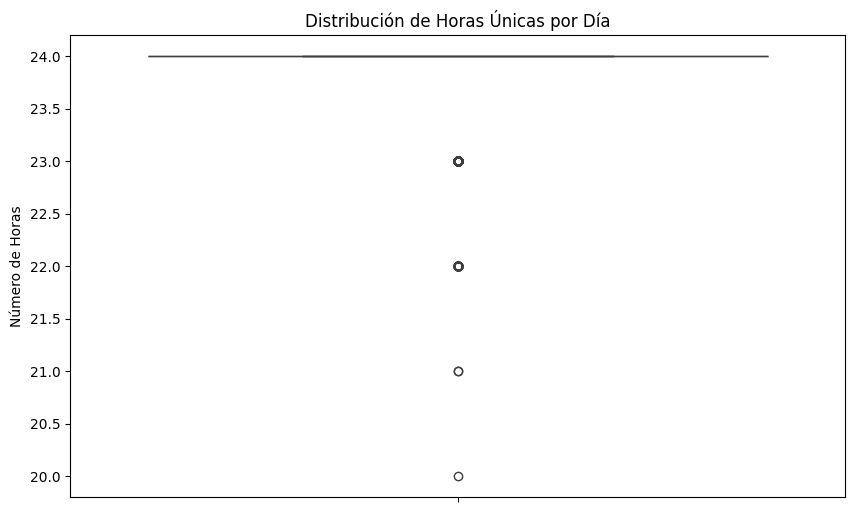

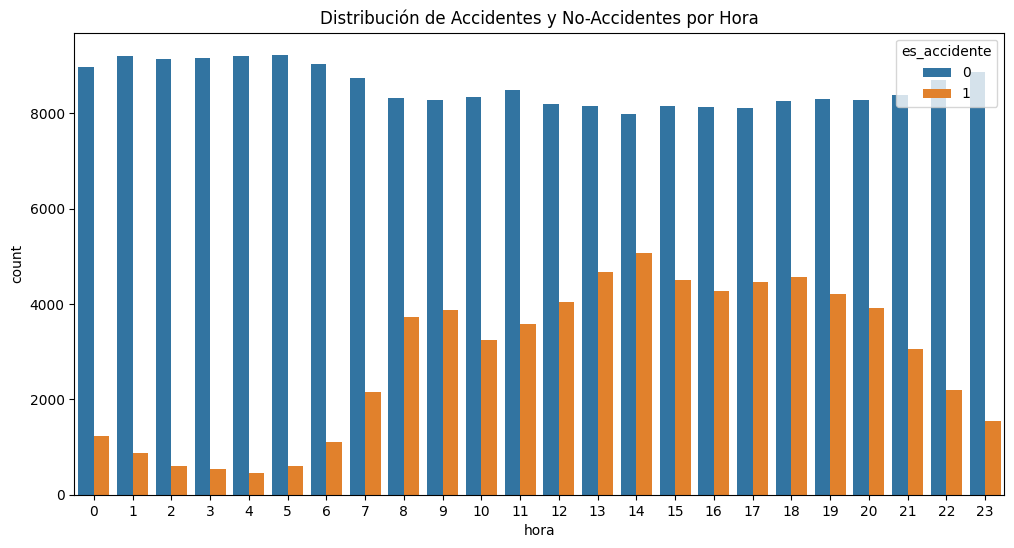

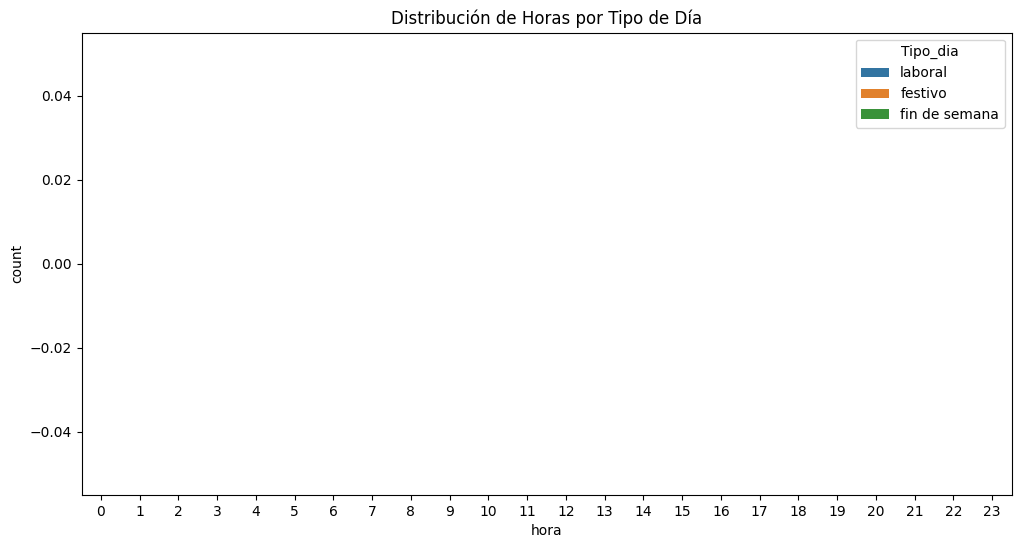


Días y horas con pocos no-accidentes (<10):
              dia  hora  count
0      2017-01-01     0      2
1      2017-01-01     1      3
2      2017-01-01     2      7
3      2017-01-01     3      1
4      2017-01-01     4      2
...           ...   ...    ...
67832  2024-12-31    19      3
67833  2024-12-31    20      1
67834  2024-12-31    21      1
67835  2024-12-31    22      2
67836  2024-12-31    23      1

[67759 rows x 3 columns]


In [662]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Verifica columnas
print("Columnas de df_final:", df_final.columns.tolist())
print("Valores de Tipo_dia:", df_final['Tipo_dia'].value_counts())

# Extrae día y hora de Fecha
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])
df_final['dia'] = df_final['Fecha'].dt.date  # Solo fecha (YYYY-MM-DD)
df_final['hora'] = df_final['Fecha'].dt.hour  # Hora (0-23)

# Paso 1: Contar horas por día
# Agrupa por día y hora, separando accidentes y no-accidentes
distribucion = df_final.groupby(['dia', 'hora', 'es_accidente']).size().unstack(fill_value=0).reset_index()
distribucion.columns = ['dia', 'hora', 'no_accidentes', 'accidentes']

# Resumen: Número de horas únicas por día
horas_por_dia = df_final.groupby('dia')['hora'].nunique().reset_index()
horas_por_dia.columns = ['dia', 'num_horas']

# Estadísticas
print("Resumen de horas por día:")
print(horas_por_dia.describe())
print("\nDías con menos de 24 horas:")
print(horas_por_dia[horas_por_dia['num_horas'] < 24])

# Paso 2: Contar horas por día y Tipo_dia
distribucion_tipo_dia = df_final.groupby(['dia', 'hora', 'Tipo_dia']).size().unstack(fill_value=0).reset_index()
print("\nHoras por día y Tipo_dia (primeros 5 días):")
print(distribucion_tipo_dia.head())

# Paso 3: Visualizaciones
# Horas por día (boxplot para ver distribución)
plt.figure(figsize=(10,6))
sns.boxplot(y='num_horas', data=horas_por_dia)
plt.title('Distribución de Horas Únicas por Día')
plt.ylabel('Número de Horas')
plt.show()

# Accidentes y no-accidentes por hora
plt.figure(figsize=(12,6))
sns.countplot(x='hora', hue='es_accidente', data=df_final)
plt.title('Distribución de Accidentes y No-Accidentes por Hora')
plt.show()

# Horas por Tipo_dia
plt.figure(figsize=(12,6))
sns.countplot(x='hora', hue='Tipo_dia', data=df_final, hue_order=['laboral', 'festivo', 'fin de semana'])
plt.title('Distribución de Horas por Tipo de Día')
plt.show()

# Paso 4: Detectar días/horas con pocos registros (gaps)
threshold = 10  # Umbral para considerar pocos registros
gaps = df_final[df_final['es_accidente'] == 0].groupby(['dia', 'hora']).size().reset_index(name='count')
gaps = gaps[gaps['count'] < threshold]
print("\nDías y horas con pocos no-accidentes (<10):")
print(gaps)

In [663]:
df_final.drop(["hora", "dia_semana","mes", "fiesta_local_x", "date_only_x", "fiesta_local_y", "date_only_y"], axis=1, inplace=True)
df_final

KeyError: "['dia_semana', 'mes', 'fiesta_local_x', 'date_only_x', 'fiesta_local_y', 'date_only_y'] not found in axis"

In [ ]:
cols_nan = ["Numero_morts", "Numero_lesionats_lleus", "Numero_lesionats_greus", "Numero_victimes", "Numero_vehicles_implicats"]
df_final[cols_nan] = df_final[cols_nan].fillna(0)

In [ ]:
df_final

,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,fiesta_local
0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.5,0.0,0.0,7.1,167,0,2017-01-01 00:00:00,Fin de semana,0
1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.2,0.0,0.0,7.1,155,0,2017-01-01 00:00:00,Fin de semana,0
2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.0,0.0,0.0,8.9,120,0,2017-01-01 01:00:00,Fin de semana,0
3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,-0.1,0.0,0.0,3.3,32,0,2017-01-01 01:00:00,Fin de semana,0
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,5.6,0.0,0.0,8.9,46,0,2017-01-01 01:00:00,Fin de semana,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274223,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.0,0.0,0.0,1.7,29,0,2024-12-31 20:00:00,Laboral,0
274224,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8.7,0.0,0.0,5.5,71,0,2024-12-31 21:00:00,Laboral,0
274225,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.8,0.0,0.0,8.1,95,0,2024-12-31 22:00:00,Laboral,0
274226,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.4,0.0,0.0,8.1,99,0,2024-12-31 22:00:00,Laboral,0


In [ ]:
df_final[df_final["es_accidente"]==1]

,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,fiesta_local
9,0.0,1.0,0.0,1.0,2.0,2.182376,41.399680,4.0,0.0,0.0,11.0,161,1,2017-01-01 02:00:00,Fin de semana,0
16,0.0,1.0,0.0,1.0,1.0,2.151330,41.400771,4.9,0.0,0.0,8.9,112,1,2017-01-01 04:00:00,Fin de semana,0
22,0.0,0.0,0.0,0.0,1.0,2.166464,41.412769,-2.3,0.0,0.0,8.7,40,1,2017-01-01 06:00:00,Fin de semana,0
28,0.0,2.0,0.0,2.0,3.0,2.193249,41.397908,3.0,0.0,0.0,10.4,143,1,2017-01-01 07:00:00,Fin de semana,0
29,0.0,1.0,0.0,1.0,2.0,2.157359,41.393310,3.3,0.0,0.0,10.4,50,1,2017-01-01 07:00:00,Fin de semana,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274205,0.0,1.0,0.0,1.0,2.0,2.207931,41.440744,13.1,0.0,0.0,4.4,139,1,2024-12-31 16:00:00,Laboral,0
274207,0.0,2.0,0.0,2.0,2.0,2.170917,41.396684,12.8,0.0,0.0,4.4,188,1,2024-12-31 16:00:00,Laboral,0
274211,0.0,0.0,1.0,1.0,1.0,2.160944,41.378622,12.1,0.0,0.0,4.9,179,1,2024-12-31 17:00:00,Laboral,0
274218,0.0,1.0,0.0,1.0,1.0,2.175002,41.415940,5.5,0.0,0.0,0.6,89,1,2024-12-31 18:00:00,Laboral,0


#### Verificando que todos los dias tengan las 24hs como minimo

In [ ]:


# Supongamos que ya cargaste tu dataset en df
# Aseguramos que 'Fecha' esté en formato datetime
df_final["Fecha"] = pd.to_datetime(df_final["Fecha"])

# Crear columnas de solo fecha y solo hora
df_final["dia"] = df_final["Fecha"].dt.date
df_final["hora"] = df_final["Fecha"].dt.hour

# Contar cuántas horas únicas hay por día
horas_por_dia = df_final.groupby("dia")["hora"].nunique().reset_index(name="horas_unicas")

# Agregar una columna para marcar si tiene las 24 horas completas
horas_por_dia["tiene_24hs"] = horas_por_dia["horas_unicas"] == 24

print(horas_por_dia)


             dia  horas_unicas  tiene_24hs
0     2017-01-01            24        True
1     2017-01-02            24        True
2     2017-01-03            24        True
3     2017-01-04            23       False
4     2017-01-05            24        True
...          ...           ...         ...
2917  2024-12-27            24        True
2918  2024-12-28            24        True
2919  2024-12-29            24        True
2920  2024-12-30            24        True
2921  2024-12-31            24        True

[2922 rows x 3 columns]


In [ ]:
import pandas as pd

# Aseguramos que 'Fecha' sea datetime
df_final["Fecha"] = pd.to_datetime(df_final["Fecha"])

# Crear rango completo de horas entre 2017-01-01 y 2024-12-31
rango_completo = pd.date_range(
    start="2017-01-01 00:00:00",
    end="2024-12-31 23:00:00",
    freq="H"
)

# Crear DataFrame con todas las fechas-horas posibles
df_completo = pd.DataFrame({"Fecha": rango_completo})

# Hacer un merge para mantener tus datos y agregar las horas faltantes
df_final_completo = df_completo.merge(df_final, on="Fecha", how="left")

print("Registros originales:", len(df_final))
print("Registros después del relleno:", len(df_final_completo))


Registros originales: 274228
Registros después del relleno: 274941


C:\Users\emili\AppData\Local\Temp\ipykernel_29768\1624428086.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rango_completo = pd.date_range(


In [ ]:
df_final_completo

,Fecha,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Tipo_dia,fiesta_local,dia,hora
0,2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.5,0.0,0.0,7.1,167.0,0.0,Fin de semana,0.0,2017-01-01,0.0
1,2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.2,0.0,0.0,7.1,155.0,0.0,Fin de semana,0.0,2017-01-01,0.0
2,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.0,0.0,0.0,8.9,120.0,0.0,Fin de semana,0.0,2017-01-01,1.0
3,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,-0.1,0.0,0.0,3.3,32.0,0.0,Fin de semana,0.0,2017-01-01,1.0
4,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,5.6,0.0,0.0,8.9,46.0,0.0,Fin de semana,0.0,2017-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2024-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.0,0.0,0.0,1.7,29.0,0.0,Laboral,0.0,2024-12-31,20.0
274937,2024-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8.7,0.0,0.0,5.5,71.0,0.0,Laboral,0.0,2024-12-31,21.0
274938,2024-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.8,0.0,0.0,8.1,95.0,0.0,Laboral,0.0,2024-12-31,22.0
274939,2024-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7.4,0.0,0.0,8.1,99.0,0.0,Laboral,0.0,2024-12-31,22.0


In [ ]:
df_meteo = pd.read_csv(r"C:\Users\emili\sp-ml-17-final-project-g3\data\processed\df_meteo.csv")


In [ ]:
# Supongamos que ya cargaste tu dataset en df
# Aseguramos que 'Fecha' esté en formato datetime
df_meteo["time_n"] = pd.to_datetime(df_meteo["time_n"])

# Crear columnas de solo fecha y solo hora
df_meteo["dia"] = df_meteo["time_n"].dt.date
df_meteo["hora"] = df_meteo["time_n"].dt.hour

# Contar cuántas horas únicas hay por día
horas_por_dia = df_meteo.groupby("dia")["hora"].nunique().reset_index(name="horas_unicas")

# Agregar una columna para marcar si tiene las 24 horas completas
horas_por_dia["tiene_24hs"] = horas_por_dia["horas_unicas"] == 24

print(horas_por_dia)


             dia  horas_unicas  tiene_24hs
0     2017-01-01            24        True
1     2017-01-02            24        True
2     2017-01-03            24        True
3     2017-01-04            24        True
4     2017-01-05            24        True
...          ...           ...         ...
2917  2024-12-27            24        True
2918  2024-12-28            24        True
2919  2024-12-29            24        True
2920  2024-12-30            24        True
2921  2024-12-31            24        True

[2922 rows x 3 columns]


In [ ]:
# Cambiar el nombre de la columna en df_meteo
df_meteo = df_meteo.rename(columns={"time_n": "Fecha"})


In [ ]:
# Supongamos que df_final y df_meteo son tus DataFrames
# df_final = pd.read_csv("df_final_actual.csv")  # Carga tu df_final actual
# df_meteo = pd.read_csv("df_meteo.csv")  # Carga df_meteo con todas las 24hs por día

# Asegurarse de que las columnas de fecha estén en formato datetime
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])
df_meteo['Fecha'] = pd.to_datetime(df_meteo['Fecha'])  # Asume que df_meteo tiene columna 'fecha' por hora

# Paso 1: Identificar los días en df_final y contar las horas por día
df_final['date_only'] = df_final['Fecha'].dt.date
daily_counts = df_final.groupby('date_only')['Fecha'].nunique().reset_index()
daily_counts = daily_counts.rename(columns={'Fecha': 'hour_count'})

# Encontrar días con menos de 24 horas
missing_days = daily_counts[daily_counts['hour_count'] < 24]

# Paso 2: Crear un DataFrame completo con todas las horas posibles para los días faltantes
missing_rows = []

for _, row in missing_days.iterrows():
    day = row['date_only']
    existing_hours = df_final[df_final['date_only'] == day]['Fecha'].dt.hour.unique()
    all_hours = set(range(24))
    missing_hours = all_hours - set(existing_hours)
    
    for hour in missing_hours:
        # Crear la fecha/hora faltante
        missing_datetime = pd.Timestamp(day) + timedelta(hours=hour)
        
        # Obtener los datos climáticos de df_meteo para esa fecha/hora
        meteo_row = df_meteo[df_meteo['Fecha'] == missing_datetime]
        
        if not meteo_row.empty:
            new_row = {}
            # Copiar columnas climáticas de df_meteo (ajusta los nombres de columnas climáticas según tu df_meteo)
            # Ejemplo: supongamos columnas como 'temperatura', 'humedad', 'precipitacion', etc.
            for col in ['temperature_2m (°C)', 'precipitation (mm)', 'snowfall (cm)', 'wind_speed_10m (km/h)']:  # Ajusta a tus columnas climáticas reales
                if col in meteo_row.columns:
                    new_row[col] = meteo_row[col].values[0]
            
            # Asignar 'fecha'
            new_row['Fecha'] = missing_datetime
            
            # Asignar valores por defecto para otras columnas en df_final
            # Ejemplo: asumir no accidente, cluster aleatorio o media, fiesta_local ya calculada, etc.
            new_row['es_accidente'] = 0  # Asume columna para indicar no accidente
            new_row['cluster'] = np.random.choice(df_final['cluster'].unique())  # Asigna cluster aleatorio; ajusta si necesario
            #new_row['fiesta_local'] = 1 if missing_datetime.date() in fiestas_dates else 0  # Ajusta con lógica de fiesta_local si ya tienes
            # Para lat/lon, usa imputación con jitter como antes
            # Primero, elige un cluster (ya asignado), luego imputa basado en media + jitter
            # (Ver código anterior para imputación; aquí simplificado)
            cluster_mean_lat = df_final[df_final['cluster'] == new_row['cluster']]['lat'].mean()
            cluster_mean_lon = df_final[df_final['cluster'] == new_row['cluster']]['lon'].mean()
            new_row['lat'] = cluster_mean_lat + np.random.uniform(-0.0005, 0.0005)
            new_row['lon'] = cluster_mean_lon + np.random.uniform(-0.0005, 0.0005)
            
            # Añadir otras columnas de df_final con valores por defecto (e.g., NaN o 0)
            for col in df_final.columns:
                if col not in new_row and col not in ['date_only']:
                    new_row[col] = 0  # O np.nan, o valor por defecto adecuado
                    
            missing_rows.append(new_row)

# Crear DataFrame con las filas faltantes
df_missing = pd.DataFrame(missing_rows)

# Asegurarse de que df_missing tenga las mismas columnas que df_final (sin 'date_only')
df_missing = df_missing[df_final.columns.drop('date_only', errors='ignore')]

# Paso 3: Append las filas faltantes a df_final
df_final = pd.concat([df_final.drop(columns=['date_only'], errors='ignore'), df_missing], ignore_index=True)

# Paso 4: Verificar el número total de registros
print("Número total de registros después de rellenar: ", len(df_final))
# Debería ser 274869; si no, verifica los días/horas calculados

# Guardar el DataFrame actualizado
df_final.to_csv("df_final_completed.csv", index=False)
print("DataFrame actualizado guardado en 'df_final_completed.csv'.")

Número total de registros después de rellenar:  274941
DataFrame actualizado guardado en 'df_final_completed.csv'.


In [ ]:
df_final

,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,...,snowfall (cm),wind_speed_10m (km/h),dia_festivo,cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.3,0,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,0.0,0.0,0.0,0.0,0.0,2.148548,41.389589,0,0,0,...,0.0,11.7,0,117,0,2024-12-12 22:00:00,0,0,0,0
274937,0.0,0.0,0.0,0.0,0.0,2.208609,41.419342,0,0,0,...,0.0,7.5,0,79,0,2024-12-17 03:00:00,0,0,0,0
274938,0.0,0.0,0.0,0.0,0.0,2.188712,41.452695,0,0,0,...,0.0,15.9,0,164,0,2024-12-17 15:00:00,0,0,0,0
274939,0.0,0.0,0.0,0.0,0.0,2.208909,41.419595,0,0,0,...,0.0,18.2,0,79,0,2024-12-23 02:00:00,0,0,0,0


In [ ]:
cols_nan = ["Numero_morts", "Numero_lesionats_lleus", "Numero_lesionats_greus", "Numero_victimes", "Numero_vehicles_implicats"]
df_final[cols_nan] = df_final[cols_nan].fillna(0)

In [ ]:
fiestas = {
    "Sant_Jordi": [
        "2017-04-23", "2018-04-23", "2019-04-23", "2020-04-23",
        "2021-04-23", "2022-04-23", "2023-04-23", "2024-04-23"
    ],
    "Sant_Joan": [
        "2017-06-23", "2018-06-23", "2019-06-23", "2020-06-23",
        "2021-06-23", "2022-06-23", "2023-06-23", "2024-06-23"
    ],
    "La_Merce": [
        "2017-09-24", "2018-09-24", "2019-09-24", "2020-09-24",
        "2021-09-24", "2022-09-24", "2023-09-24", "2024-09-24"
    ],
    "Festa_Major_de_Gracia": [
        ("2017-08-15", "2017-08-21"), ("2018-08-15", "2018-08-21"),
        ("2019-08-15", "2019-08-21"), ("2020-08-15", "2020-08-21"),
        ("2021-08-15", "2021-08-21"), ("2022-08-15", "2022-08-21"),
        ("2023-08-15", "2023-08-21"), ("2024-08-15", "2024-08-21")
    ]
}

# Generar rango de fechas desde 2017-01-01 hasta 2024-12-31
start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 12, 31)
date_list = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Crear lista para la columna "fiesta_local"
fiesta_local_column = []
for date in date_list:
    date_str = date.strftime("%Y-%m-%d")
    is_fiesta = 0
    
    # Verificar si la fecha coincide con alguna fiesta
    for fiesta, dates in fiestas.items():
        if fiesta == "Festa_Major_de_Gracia":
            # Para Festa Major de Gràcia, verificar el rango de fechas
            for start, end in dates:
                start_dt = datetime.strptime(start, "%Y-%m-%d")
                end_dt = datetime.strptime(end, "%Y-%m-%d")
                if start_dt <= date <= end_dt:
                    is_fiesta = 1
                    break
        else:
            # Para otras fiestas, verificar si la fecha exacta coincide
            if date_str in dates:
                is_fiesta = 1
                break
    
    fiesta_local_column.append(is_fiesta)

# Crear DataFrame de fiestas y guardar como CSV
fiestas_df = pd.DataFrame({
    "date": [d.strftime("%Y-%m-%d") for d in date_list],
    "fiesta_local": fiesta_local_column
})
fiestas_df['date'] = pd.to_datetime(fiestas_df['date'])
fiestas_df.to_csv("barcelona_fiestas_local.csv", index=False)
print("Archivo 'barcelona_fiestas_local.csv' generado con éxito.")

# Paso 2: Fusionar con df_final
# Supongamos que df_final es tu DataFrame existente
# Asegúrate de reemplazar 'fecha' por el nombre real de la columna de fechas en df_final
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])

# Crear una columna temporal con solo la fecha (sin hora) en ambos DataFrames
df_final['fecha_only'] = df_final['Fecha'].dt.date
fiestas_df['date_only'] = fiestas_df['date'].dt.date

# Realizar el merge usando la columna de solo fechas
df_final = df_final.merge(
    fiestas_df[['date_only', 'fiesta_local']],
    left_on='fecha_only',
    right_on='date_only',
    how='left'
)

# Rellenar valores NaN en la columna 'fiesta_local' con 0
df_final['fiesta_local'] = df_final['fiesta_local'].fillna(0).astype(int)

# Eliminar columnas temporales y redundantes
df_final = df_final.drop(columns=['fecha_only', 'date_only'], errors='ignore')

Archivo 'barcelona_fiestas_local.csv' generado con éxito.


In [ ]:
df_final.drop("dia_festivo", axis=1, inplace=True)

In [ ]:
df_final

,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,...,wind_speed_10m (km/h),dia_festivo,cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora,fiesta_local
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,0,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,0,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,0,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.3,0,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,0,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,0.0,0.0,0.0,0.0,0.0,2.148548,41.389589,0,0,0,...,11.7,0,117,0,2024-12-12 22:00:00,0,0,0,0,0
274937,0.0,0.0,0.0,0.0,0.0,2.208609,41.419342,0,0,0,...,7.5,0,79,0,2024-12-17 03:00:00,0,0,0,0,0
274938,0.0,0.0,0.0,0.0,0.0,2.188712,41.452695,0,0,0,...,15.9,0,164,0,2024-12-17 15:00:00,0,0,0,0,0
274939,0.0,0.0,0.0,0.0,0.0,2.208909,41.419595,0,0,0,...,18.2,0,79,0,2024-12-23 02:00:00,0,0,0,0,0


In [ ]:
df_final

,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,...,snowfall (cm),wind_speed_10m (km/h),dia_festivo,cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0,60,0,2017-01-01 00:00:00,Fin de semana,False,2017-01-01,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0,81,0,2017-01-01 00:00:00,Fin de semana,False,2017-01-01,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0,79,0,2017-01-01 01:00:00,Fin de semana,False,2017-01-01,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.3,0,191,0,2017-01-01 01:00:00,Fin de semana,False,2017-01-01,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0,177,0,2017-01-01 01:00:00,Fin de semana,False,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.7,0,31,0,2024-12-31 20:00:00,Laboral,False,2024-12-31,20
274224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.5,0,169,0,2024-12-31 21:00:00,Laboral,False,2024-12-31,21
274225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.1,0,6,0,2024-12-31 22:00:00,Laboral,False,2024-12-31,22
274226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.1,0,176,0,2024-12-31 22:00:00,Laboral,False,2024-12-31,22


In [ ]:
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])

# Definir las columnas a excluir del reemplazo de NaN
exclude_columns = ['lat', 'lon']  # Cambia si las columnas a excluir son otras

# Identificar todas las columnas a procesar (excluyendo las especificadas)
columns_to_fill = [col for col in df_final.columns if col not in exclude_columns]

# Verificar valores NaN antes del reemplazo
print("Valores NaN por columna antes del reemplazo:")
print(df_final.isna().sum())

# Reemplazar NaN con 0 en las columnas seleccionadas
for col in columns_to_fill:
    df_final[col] = df_final[col].fillna(0)

# Verificar valores NaN después del reemplazo
print("\nValores NaN por columna después del reemplazo:")
print(df_final.isna().sum())

# Verificar el total de registros
print("\nTotal de registros:", len(df_final))
if len(df_final) == 274869:
    print("El total de registros coincide con 274869.")
else:
    print("Advertencia: El total de registros no es 274869. Verifica el DataFrame de entrada.")

# Mostrar las primeras filas para inspección
print("\nPrimeras filas de df_final:")
print(df_final.head())


Valores NaN por columna antes del reemplazo:
Numero_morts                       0
Numero_lesionats_lleus             0
Numero_lesionats_greus             0
Numero_victimes                    0
Numero_vehicles_implicats          0
lon                           205671
lat                           205671
Descripcio_causa_vianant           0
Descripcio_causa_conductor         0
Descripcio_causa_mediata           0
temperature_2m (°C)                0
precipitation (mm)                 0
snowfall (cm)                      0
wind_speed_10m (km/h)              0
dia_festivo                        0
cluster                            0
es_accidente                       0
Fecha                              0
Tipo_dia                           0
Festivo                            0
dia                                0
hora                               0
fiesta_local                       0
fecha                              0
dtype: int64

Valores NaN por columna después del reemplazo:
Numero

In [ ]:
df_final

,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,...,wind_speed_10m (km/h),dia_festivo,cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora,fiesta_local
0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,...,7.1,0,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0,0
1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,...,7.1,0,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0,0
2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,...,8.9,0,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,...,3.3,0,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,...,8.9,0,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,0.0,0.0,0.0,0.0,0.0,2.148548,41.389589,0,0,0,...,11.7,0,117,0,2024-12-12 22:00:00,Laboral,0,0,0,0
274937,0.0,0.0,0.0,0.0,0.0,2.208609,41.419342,0,0,0,...,7.5,0,79,0,2024-12-17 03:00:00,Laboral,0,0,0,0
274938,0.0,0.0,0.0,0.0,0.0,2.188712,41.452695,0,0,0,...,15.9,0,164,0,2024-12-17 15:00:00,Laboral,0,0,0,0
274939,0.0,0.0,0.0,0.0,0.0,2.208909,41.419595,0,0,0,...,18.2,0,79,0,2024-12-23 02:00:00,Laboral,0,0,0,0


In [ ]:

# Paso 1: Identificar accidentes y no accidentes
# Usamos 'es_accidente' == 1 para accidentes si existe; si no, usamos lat/lon no-NaN
mask_accidentes = (df_final['es_accidente'] == 1) & df_final['lat'].notna() & df_final['lon'].notna() if 'es_accidente' in df_final.columns else df_final['lat'].notna() & df_final['lon'].notna()
mask_no_accident = (df_final['es_accidente'] == 0) if 'es_accidente' in df_final.columns else (df_final['lat'].isna() | df_final['lon'].isna())

# Paso 2: Calcular la media de lat/lon por cluster solo para accidentes
cluster_means = df_final[mask_accidentes].groupby('cluster')[['lat', 'lon']].mean().reset_index()
cluster_means = cluster_means.rename(columns={'lat': 'mean_lat', 'lon': 'mean_lon'})

# Fusionar medias a df_final
df_final = df_final.merge(cluster_means, on='cluster', how='left')

# Paso 3: Función para agregar jitter pequeño (~±50 metros)
def add_jitter(coord):
    return coord + np.random.uniform(-0.0030, 0.0030)

# Paso 4: Imputar lat/lon para no accidentes con media + jitter
df_final.loc[mask_no_accident, 'lat'] = df_final.loc[mask_no_accident, 'mean_lat'].apply(add_jitter)
df_final.loc[mask_no_accident, 'lon'] = df_final.loc[mask_no_accident, 'mean_lon'].apply(add_jitter)

# Paso 5: Manejar clusters sin accidentes (usar media global + jitter)
global_mean_lat = df_final[mask_accidentes]['lat'].mean()
global_mean_lon = df_final[mask_accidentes]['lon'].mean()
df_final['lat'] = df_final['lat'].fillna(add_jitter(global_mean_lat))
df_final['lon'] = df_final['lon'].fillna(add_jitter(global_mean_lon))

# Paso 6: Verificar y corregir superposiciones en lat/lon/fecha
# Crear clave temporal para identificar duplicados
df_final['lat_lon_fecha'] = df_final['lat'].round(6).astype(str) + '_' + df_final['lon'].round(6).astype(str) + '_' + df_final['Fecha'].astype(str)

# Identificar duplicados
duplicates = df_final[df_final.duplicated(subset=['lat_lon_fecha'], keep=False)]
if not duplicates.empty:
    print("Advertencia: Se encontraron coincidencias en lat/lon/fecha. Reaplicando jitter a no accidentes.")
    mask_duplicates_no_acc = mask_no_accident & df_final['lat_lon_fecha'].duplicated(keep=False)
    # Reaplicar jitter hasta eliminar duplicados
    while not df_final[mask_duplicates_no_acc].empty:
        df_final.loc[mask_duplicates_no_acc, 'lat'] = df_final.loc[mask_duplicates_no_acc, 'mean_lat'].apply(add_jitter)
        df_final.loc[mask_duplicates_no_acc, 'lon'] = df_final.loc[mask_duplicates_no_acc, 'mean_lon'].apply(add_jitter)
        # Actualizar clave temporal
        df_final['lat_lon_fecha'] = df_final['lat'].round(6).astype(str) + '_' + df_final['lon'].round(6).astype(str) + '_' + df_final['fecha'].astype(str)
        mask_duplicates_no_acc = mask_no_accident & df_final['lat_lon_fecha'].duplicated(keep=False)

# Eliminar columna temporal
df_final = df_final.drop(columns=['lat_lon_fecha', 'mean_lat', 'mean_lon'], errors='ignore')

# Paso 7: Verificaciones finales
print("Número de NaN en lat después de imputación:", df_final['lat'].isna().sum())
print("Número de NaN en lon después de imputación:", df_final['lon'].isna().sum())
print("Total de registros:", len(df_final))
if len(df_final) == 274869:
    print("El total de registros coincide con 274869.")
else:
    print("Advertencia: El total de registros no es 274869. Verifica el DataFrame de entrada.")
print("\nPrimeras filas de df_final:")
print(df_final.head())

# Guardar el DataFrame actualizado
df_final.to_csv("df_final_with_imputed_lat_lon_no_overlap.csv", index=False)
print("DataFrame actualizado guardado en 'df_final_with_imputed_lat_lon_no_overlap.csv'.")

Advertencia: Se encontraron coincidencias en lat/lon/fecha. Reaplicando jitter a no accidentes.
Número de NaN en lat después de imputación: 0
Número de NaN en lon después de imputación: 0
Total de registros: 274228
Advertencia: El total de registros no es 274869. Verifica el DataFrame de entrada.

Primeras filas de df_final:
   Numero_morts  Numero_lesionats_lleus  Numero_lesionats_greus  \
0           NaN                     NaN                     NaN   
1           NaN                     NaN                     NaN   
2           NaN                     NaN                     NaN   
3           NaN                     NaN                     NaN   
4           NaN                     NaN                     NaN   

   Numero_victimes  Numero_vehicles_implicats       lon        lat  \
0              NaN                        NaN  2.145916  41.425586   
1              NaN                        NaN  2.157948  41.386383   
2              NaN                        NaN  2.190018  41.

In [ ]:
df_final.drop(["Numero_morts", "Numero_lesionats_lleus", "Numero_lesionats_greus", "Numero_victimes", "Numero_vehicles_implicats", "dia_festivo", "mean_lat_x", "mean_lon_x", 
"mean_lat_y", "mean_lon_y"], axis=1, inplace=True)
df_final

KeyError: "['Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes', 'Numero_vehicles_implicats', 'dia_festivo', 'mean_lat_x', 'mean_lon_x', 'mean_lat_y', 'mean_lon_y'] not found in axis"

In [ ]:
# 1. Ver si existe algún NaN en todo el dataset
print("¿Hay algún NaN en el dataset?:", df_final.isnull().values.any())

# 2. Contar cuántos NaN hay por columna
print("\nCantidad de NaN por columna:")
print(df_final.isnull().sum())

# 3. Porcentaje de NaN por columna
print("\nPorcentaje de NaN por columna:")
print((df_final.isnull().sum() / len(df_final)) * 100)

# 4. Número total de NaN en todo el DataFrame
print("\nTotal de NaN en todo el dataset:", df_final.isnull().sum().sum())


¿Hay algún NaN en el dataset?: False

Cantidad de NaN por columna:
lon                           0
lat                           0
Descripcio_causa_vianant      0
Descripcio_causa_conductor    0
Descripcio_causa_mediata      0
temperature_2m (°C)           0
precipitation (mm)            0
snowfall (cm)                 0
wind_speed_10m (km/h)         0
cluster                       0
es_accidente                  0
Fecha                         0
Tipo_dia                      0
Festivo                       0
dia                           0
hora                          0
fiesta_local                  0
dtype: int64

Porcentaje de NaN por columna:
lon                           0.0
lat                           0.0
Descripcio_causa_vianant      0.0
Descripcio_causa_conductor    0.0
Descripcio_causa_mediata      0.0
temperature_2m (°C)           0.0
precipitation (mm)            0.0
snowfall (cm)                 0.0
wind_speed_10m (km/h)         0.0
cluster                       0.0
es_a

#### Visualizaciones

- Distribucion de Accidentes

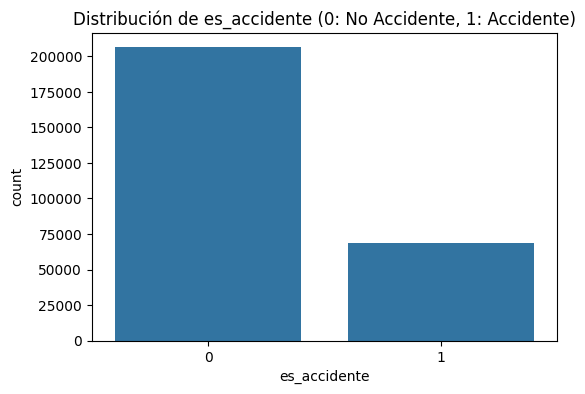

Proporción de es_accidente:
es_accidente
0    0.750648
1    0.249352
Name: proportion, dtype: float64


In [ ]:
# Distribución de es_accidente
plt.figure(figsize=(6, 4))
sns.countplot(x='es_accidente', data=df_final)
plt.title('Distribución de es_accidente (0: No Accidente, 1: Accidente)')
plt.show()
print("Proporción de es_accidente:")
print(df_final['es_accidente'].value_counts(normalize=True))

- Graficos de correlacion

In [ ]:
df_final.dtypes

lon                                  float64
lat                                  float64
Descripcio_causa_vianant              object
Descripcio_causa_conductor            object
Descripcio_causa_mediata              object
temperature_2m (°C)                  float64
precipitation (mm)                   float64
snowfall (cm)                        float64
wind_speed_10m (km/h)                float64
cluster                                int64
es_accidente                           int64
Fecha                         datetime64[ns]
Tipo_dia                              object
Festivo                                int64
dia                                   object
hora                                   int64
fiesta_local                           int64
dtype: object

In [ ]:
df_final["dia"] = pd.to_datetime(df_final["dia"])

> Heatmap

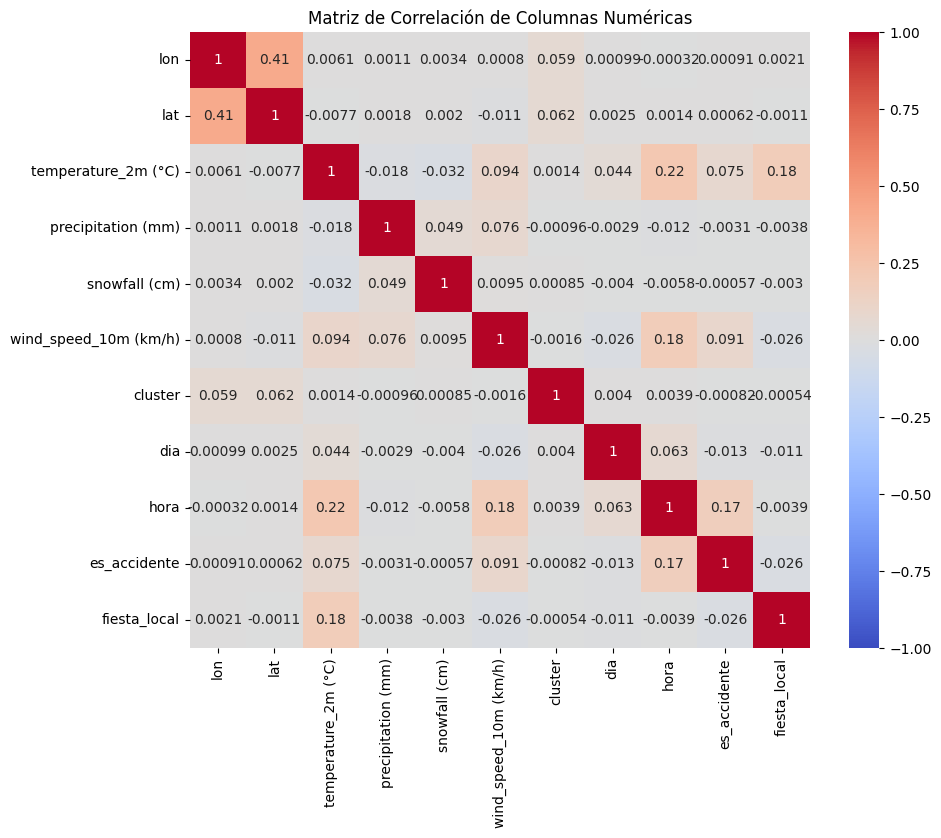

In [ ]:
# Seleccionar columnas numéricas
numeric_cols = ['lon', 'lat', 'temperature_2m (°C)', 'precipitation (mm)', 'snowfall (cm)', 
                'wind_speed_10m (km/h)', 'cluster', 'dia', 'hora', 'es_accidente', 'fiesta_local']

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_final[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Columnas Numéricas')
plt.show()

- Podemos analizar que hay pocas relaciones con nuestra variable tarjet

------

> Analisis de variables categoricas

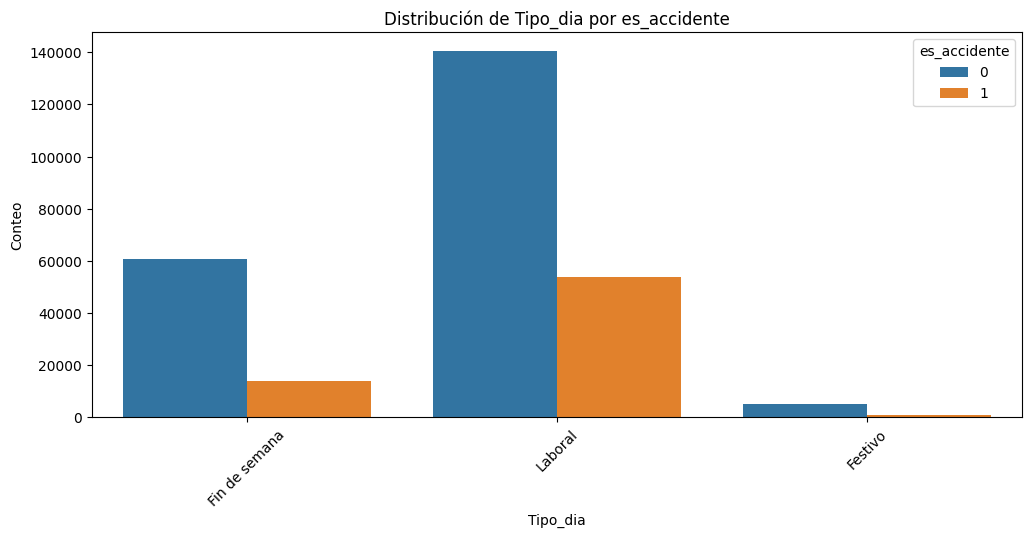

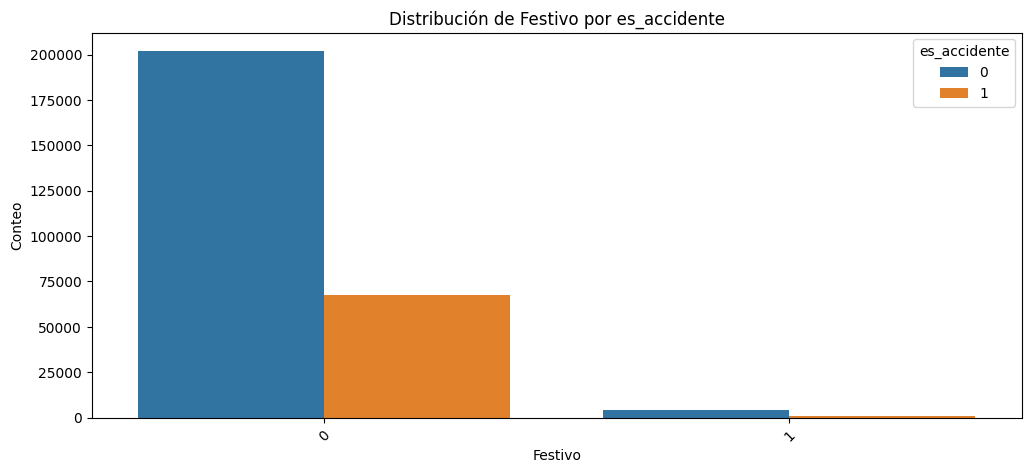

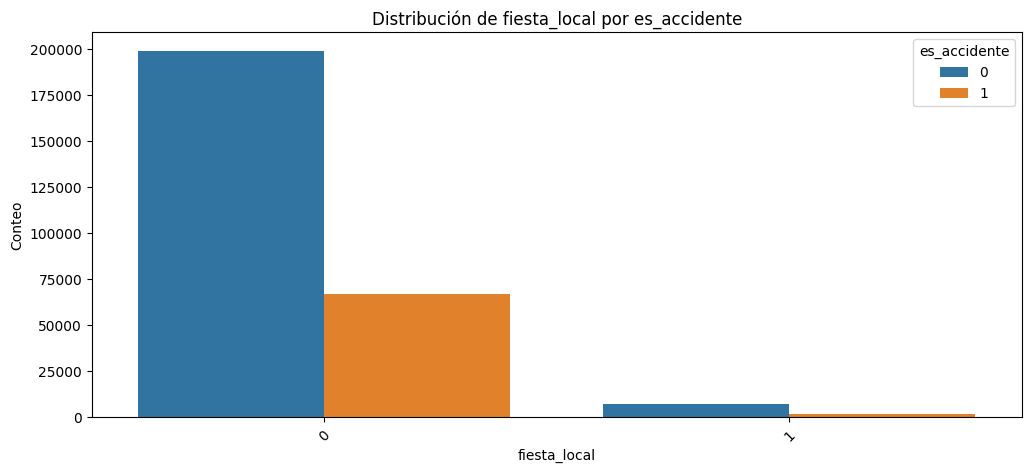

In [ ]:
cat_cols = ['Tipo_dia', 'Festivo', 'fiesta_local']
for col in cat_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(x=col, hue='es_accidente', data=df_final)
    plt.title(f'Distribución de {col} por es_accidente')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()

________

> Analisis temporal

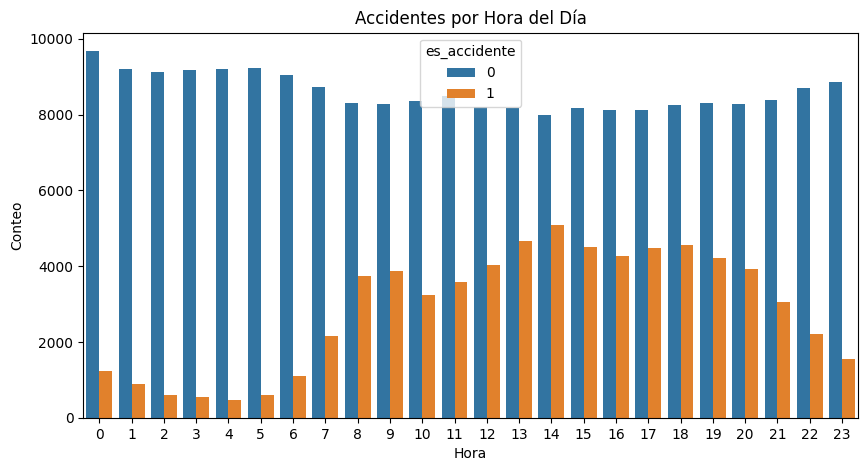

In [ ]:
# Accidentes por hora
plt.figure(figsize=(10, 5))
sns.countplot(x='hora', hue='es_accidente', data=df_final)
plt.title('Accidentes por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.show()


- Vemos que la mayoria de los accidentes ocurren en horarios laborales, lo que es logico

------

In [ ]:
df_final['dia'] = df_final['Fecha'].dt.dayofweek + 1

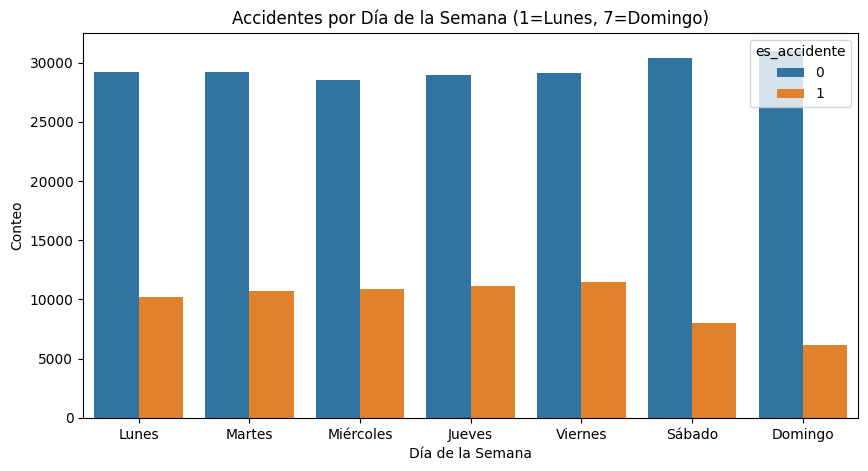

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(x='dia', hue='es_accidente', data=df_final, 
              order=[1, 2, 3, 4, 5, 6, 7])
plt.title('Accidentes por Día de la Semana (1=Lunes, 7=Domingo)')
plt.xlabel('Día de la Semana')
plt.ylabel('Conteo')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], 
           labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()


- Podemos observar que no hay mucha diferencia entre la distribucion de los accidentes en los dias de semana, siendo el viernes el dia con mas accidentes, levemente por encima de los demas.

------

> Analisis de accidentes por mes

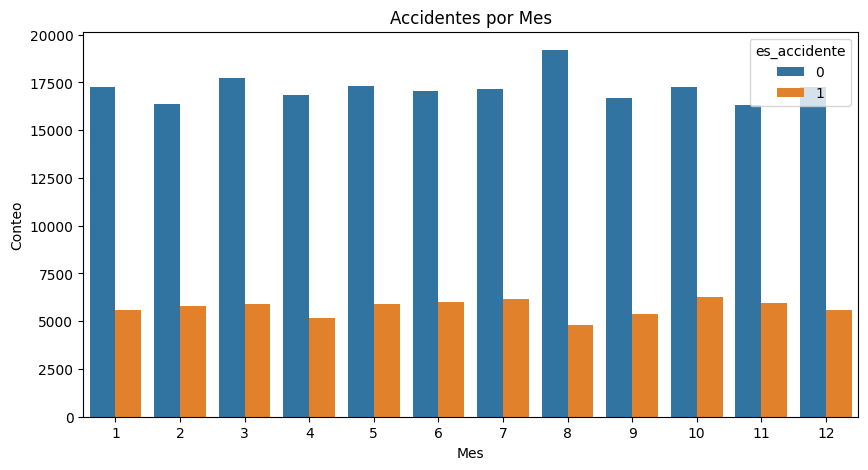

In [ ]:
# Accidentes por mes
df_final['mes'] = df_final['Fecha'].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(x='mes', hue='es_accidente', data=df_final)
plt.title('Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Conteo')
plt.show()


- Tampoco podemos observar ninguna diferencia notable entre los meses. Siendo levemente mayor la cantidad de accidentes registrados en Octubre.

-----

> Analisis Geografico

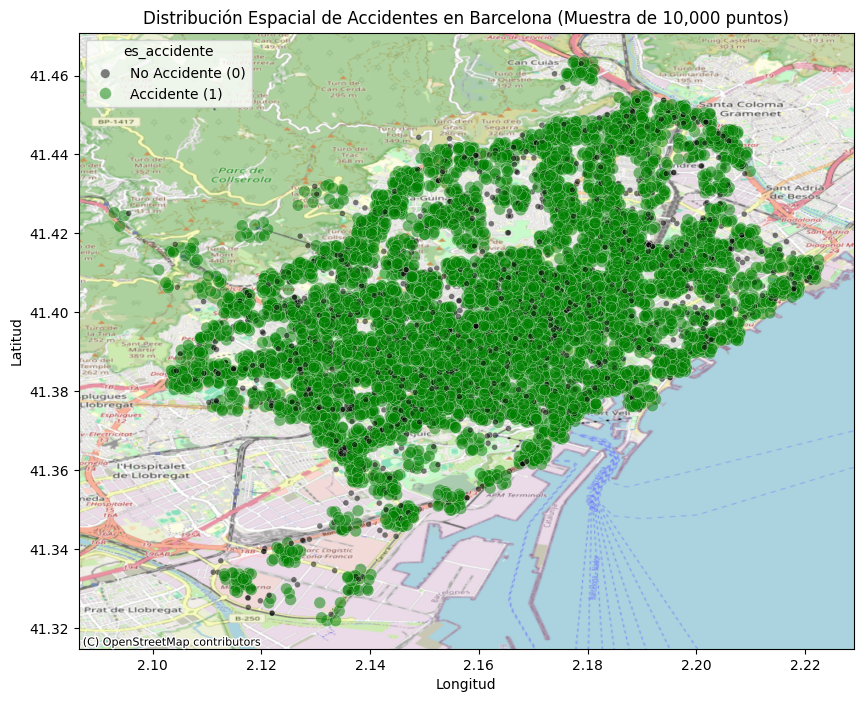

In [ ]:
# Tomar una muestra de 10,000 puntos
df_sample = df_final.sample(10000, random_state=42)

# Convertir el DataFrame a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_sample['lon'], df_sample['lat'])]
gdf = gpd.GeoDataFrame(df_sample, geometry=geometry, crs="EPSG:4326")

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar los puntos con seaborn (usando GeoDataFrame)
sns.scatterplot(x='lon', y='lat', hue='es_accidente', size='es_accidente', 
                data=df_sample, alpha=0.5, ax=ax, palette={0: "green", 1: 'black'})

# Agregar el mapa base de Barcelona usando Contextily
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Personalizar el gráfico
plt.title('Distribución Espacial de Accidentes en Barcelona (Muestra de 10,000 puntos)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Ajustar la leyenda
plt.legend(title='es_accidente', labels=['No Accidente (0)', 'Accidente (1)'])

# Mostrar el gráfico
plt.show()

In [ ]:
df_final_completo = pd.read_csv(r"C:\Users\emili\sp-ml-17-final-project-g3\notebooks\df_final_completed.csv")
df_final_completo


,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,...,snowfall (cm),wind_speed_10m (km/h),dia_festivo,cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.1,0,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.3,0,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,8.9,0,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,0.0,0.0,0.0,0.0,0.0,2.148548,41.389589,0,0,0,...,0.0,11.7,0,117,0,2024-12-12 22:00:00,0,0,0,0
274937,0.0,0.0,0.0,0.0,0.0,2.208609,41.419342,0,0,0,...,0.0,7.5,0,79,0,2024-12-17 03:00:00,0,0,0,0
274938,0.0,0.0,0.0,0.0,0.0,2.188712,41.452695,0,0,0,...,0.0,15.9,0,164,0,2024-12-17 15:00:00,0,0,0,0
274939,0.0,0.0,0.0,0.0,0.0,2.208909,41.419595,0,0,0,...,0.0,18.2,0,79,0,2024-12-23 02:00:00,0,0,0,0


In [ ]:
df_final_completo.columns

Index(['Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus',
       'Numero_victimes', 'Numero_vehicles_implicats', 'lon', 'lat',
       'Descripcio_causa_vianant', 'Descripcio_causa_conductor',
       'Descripcio_causa_mediata', 'temperature_2m (°C)', 'precipitation (mm)',
       'snowfall (cm)', 'wind_speed_10m (km/h)', 'dia_festivo', 'cluster',
       'es_accidente', 'Fecha', 'Tipo_dia', 'Festivo', 'dia', 'hora'],
      dtype='object')

In [ ]:
df_final_completo.drop(['Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus',
       'Numero_victimes', 'Numero_vehicles_implicats', "dia_festivo"], axis=1, inplace=True)
df_final_completo

,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,NaN,NaN,NaN,NaN,NaN,3.5,0.0,0.0,7.1,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
1,NaN,NaN,NaN,NaN,NaN,7.2,0.0,0.0,7.1,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
2,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,8.9,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
3,NaN,NaN,NaN,NaN,NaN,-0.1,0.0,0.0,3.3,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
4,NaN,NaN,NaN,NaN,NaN,5.6,0.0,0.0,8.9,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2.148548,41.389589,0,0,0,10.1,0.1,0.0,11.7,117,0,2024-12-12 22:00:00,0,0,0,0
274937,2.208609,41.419342,0,0,0,5.2,0.0,0.0,7.5,79,0,2024-12-17 03:00:00,0,0,0,0
274938,2.188712,41.452695,0,0,0,14.3,0.0,0.0,15.9,164,0,2024-12-17 15:00:00,0,0,0,0
274939,2.208909,41.419595,0,0,0,10.9,0.0,0.0,18.2,79,0,2024-12-23 02:00:00,0,0,0,0


In [ ]:
cols_nan = ['Descripcio_causa_vianant', 'Descripcio_causa_conductor',
       'Descripcio_causa_mediata']
df_final_completo[cols_nan] = df_final_completo[cols_nan].fillna(0)

In [ ]:
df_final_completo

,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,2.105116,41.384676,0,0,0,3.5,0.0,0.0,7.1,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
1,2.149019,41.384145,0,0,0,7.2,0.0,0.0,7.1,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
2,2.215306,41.405801,0,0,0,7.0,0.0,0.0,8.9,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
3,2.152884,41.400097,0,0,0,-0.1,0.0,0.0,3.3,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
4,2.194670,41.394825,0,0,0,5.6,0.0,0.0,8.9,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2.147345,41.387847,0,0,0,10.1,0.1,0.0,11.7,117,0,2024-12-12 22:00:00,0,0,0,22
274937,2.209324,41.422190,0,0,0,5.2,0.0,0.0,7.5,79,0,2024-12-17 03:00:00,0,0,0,3
274938,2.190489,41.451970,0,0,0,14.3,0.0,0.0,15.9,164,0,2024-12-17 15:00:00,0,0,0,15
274939,2.206748,41.421535,0,0,0,10.9,0.0,0.0,18.2,79,0,2024-12-23 02:00:00,0,0,0,2


In [ ]:
# Verificar registros iniciales
print("Registros iniciales:", len(df_final_completo))
if len(df_final_completo) != 274941:
    print(f"Error: Se esperaban 274,941 registros, pero hay {len(df_final_completo)}.")

# Asegurarse de que 'Fecha' esté en formato datetime
df_final_completo['Fecha'] = pd.to_datetime(df_final_completo['Fecha'], errors='coerce')
print("NaN en Fecha:", df_final_completo['Fecha'].isna().sum())
df_final_completo = df_final_completo.dropna(subset=['Fecha'])
print("Registros después de limpiar NaN en Fecha:", len(df_final_completo))

# Extraer hora (ya está en formato HH:00:00, pero confirmamos)
df_final_completo['fecha_hora'] = df_final_completo['Fecha'].dt.strftime('%Y-%m-%d %H:00:00')

# Verificar NaN en columnas críticas
print("\nNaN en columnas críticas:")
print(f"lat: {df_final_completo['lat'].isna().sum()}")
print(f"lon: {df_final_completo['lon'].isna().sum()}")
print(f"es_accidente: {df_final_completo['es_accidente'].isna().sum()}")
print(f"cluster: {df_final_completo['cluster'].isna().sum()}")
print(f"fecha_hora: {df_final_completo['fecha_hora'].isna().sum()}")

# Rellenar NaN en es_accidente y cluster
df_final_completo['es_accidente'] = df_final_completo['es_accidente'].fillna(0)
df_final_completo['cluster'] = df_final_completo['cluster'].fillna(0)

# Identificar accidentes y no accidentes
mask_accidentes = (df_final_completo['es_accidente'] == 1) & df_final_completo['lat'].notna() & df_final_completo['lon'].notna()
mask_no_accident = (df_final_completo['es_accidente'] == 0) | df_final_completo['lat'].isna() | df_final_completo['lon'].isna()
print(f"\nRegistros con es_accidente == 1: {mask_accidentes.sum()}")
print(f"Registros con es_accidente == 0: {mask_no_accident.sum()}")

# Obtener coordenadas de accidentes
accident_coords = df_final_completo[mask_accidentes][['lat', 'lon', 'cluster', 'fecha_hora']].copy()
global_mean_lat = accident_coords['lat'].mean()
global_mean_lon = accident_coords['lon'].mean()

# Función para muestrear coordenadas con jitter de ±300 metros (~±0.0027 grados)
def sample_coords(row, accident_coords):
    if row['es_accidente'] == 0 or pd.isna(row['lat']) or pd.isna(row['lon']):
        cluster = row['cluster']
        cluster_accidents = accident_coords[accident_coords['cluster'] == cluster]
        if not cluster_accidents.empty:
            sample = cluster_accidents.sample(1, random_state=np.random.randint(0, 10000))
            lat = sample['lat'].values[0] + np.random.uniform(-0.0027, 0.0027)
            lon = sample['lon'].values[0] + np.random.uniform(-0.0027, 0.0027)
        else:
            lat = global_mean_lat + np.random.uniform(-0.0027, 0.0027)
            lon = global_mean_lon + np.random.uniform(-0.0027, 0.0027)
        return lat, lon
    return row['lat'], row['lon']

# Imputar lat/lon para no accidentes
df_final_completo[['lat', 'lon']] = df_final_completo.apply(lambda row: sample_coords(row, accident_coords), axis=1, result_type='expand')
print("Registros después de imputación:", len(df_final_completo))

# Limitar coordenadas al rango de Barcelona
df_final_completo['lat'] = df_final_completo['lat'].clip(lower=41.3, upper=41.5)
df_final_completo['lon'] = df_final_completo['lon'].clip(lower=2.0, upper=2.3)

# Verificar superposiciones en lat/lon/fecha_hora
df_final_completo['lat_lon_fecha_hora'] = (
    df_final_completo['lat'].round(6).astype(str) + '_' +
    df_final_completo['lon'].round(6).astype(str) + '_' +
    df_final_completo['fecha_hora']
)
duplicates = df_final_completo[df_final_completo.duplicated(subset=['lat_lon_fecha_hora'], keep=False)]
max_attempts = 20
attempt = 1

if not duplicates.empty:
    print(f"Advertencia: Se encontraron {len(duplicates)} coincidencias en lat/lon/fecha_hora.")
    mask_duplicates_no_acc = mask_no_accident & df_final_completo['lat_lon_fecha_hora'].duplicated(keep=False)
    while not df_final_completo[mask_duplicates_no_acc].empty and attempt <= max_attempts:
        print(f"Intento {attempt} de reasignación de muestreo...")
        df_final_completo.loc[mask_duplicates_no_acc, ['lat', 'lon']] = df_final_completo.loc[mask_duplicates_no_acc].apply(
            lambda row: sample_coords(row, accident_coords), axis=1, result_type='expand')
        df_final_completo['lat'] = df_final_completo['lat'].clip(lower=41.3, upper=41.5)
        df_final_completo['lon'] = df_final_completo['lon'].clip(lower=2.0, upper=2.3)
        df_final_completo['lat_lon_fecha_hora'] = (
            df_final_completo['lat'].round(6).astype(str) + '_' +
            df_final_completo['lon'].round(6).astype(str) + '_' +
            df_final_completo['fecha_hora']
        )
        mask_duplicates_no_acc = mask_no_accident & df_final_completo['lat_lon_fecha_hora'].duplicated(keep=False)
        attempt += 1
        print(f"Registros después del intento {attempt - 1}: {len(df_final_completo)}")

    if not df_final_completo[mask_duplicates_no_acc].empty:
        print(f"Advertencia: No se resolvieron todas las coincidencias después de {max_attempts} intentos.")
        print(f"Quedan {len(df_final_completo[mask_duplicates_no_acc])} duplicados en no accidentes.")
    else:
        print("Todas las coincidencias en lat/lon/fecha_hora han sido resueltas.")

# Verificar duplicados finales
duplicates_final = df_final_completo[df_final_completo.duplicated(subset=['lat_lon_fecha_hora'], keep=False)]
if duplicates_final.empty:
    print("No hay duplicados en lat/lon/fecha_hora después de la corrección.")
else:
    print(f"Advertencia: Quedan {len(duplicates_final)} duplicados en lat/lon/fecha_hora.")
    # Verificar si los duplicados son entre accidentes o no accidentes
    duplicates_acc = duplicates_final[duplicates_final['es_accidente'] == 1]
    duplicates_no_acc = duplicates_final[duplicates_final['es_accidente'] == 0]
    print(f"Duplicados en accidentes: {len(duplicates_acc)}")
    print(f"Duplicados en no accidentes: {len(duplicates_no_acc)}")

# Eliminar columna temporal
df_final_completo = df_final_completo.drop(columns=['lat_lon_fecha_hora', 'fecha_hora'], errors='ignore')
print("Registros finales:", len(df_final_completo))

# Guardar el DataFrame
df_final_completo.to_csv("df_final_completo_with_imputed_lat_lon_no_duplicates.csv", index=False)
print("DataFrame actualizado guardado en 'df_final_completo_with_imputed_lat_lon_no_duplicates.csv'.")

Registros iniciales: 274941
NaN en Fecha: 0
Registros después de limpiar NaN en Fecha: 274941

NaN en columnas críticas:
lat: 0
lon: 0
es_accidente: 0
cluster: 0
fecha_hora: 0

Registros con es_accidente == 1: 68557
Registros con es_accidente == 0: 206384
Registros después de imputación: 274941
Advertencia: Se encontraron 2516 coincidencias en lat/lon/fecha_hora.
Todas las coincidencias en lat/lon/fecha_hora han sido resueltas.
Advertencia: Quedan 2516 duplicados en lat/lon/fecha_hora.
Duplicados en accidentes: 2516
Duplicados en no accidentes: 0
Registros finales: 274941
DataFrame actualizado guardado en 'df_final_completo_with_imputed_lat_lon_no_duplicates.csv'.


In [ ]:
df_final_completo

,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,2.102477,41.385437,0,0,0,3.5,0.0,0.0,7.1,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
1,2.150096,41.382647,0,0,0,7.2,0.0,0.0,7.1,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
2,2.211578,41.408096,0,0,0,7.0,0.0,0.0,8.9,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
3,2.156381,41.402319,0,0,0,-0.1,0.0,0.0,3.3,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
4,2.189408,41.398465,0,0,0,5.6,0.0,0.0,8.9,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2.143635,41.388437,0,0,0,10.1,0.1,0.0,11.7,117,0,2024-12-12 22:00:00,0,0,0,22
274937,2.205783,41.417738,0,0,0,5.2,0.0,0.0,7.5,79,0,2024-12-17 03:00:00,0,0,0,3
274938,2.189406,41.451356,0,0,0,14.3,0.0,0.0,15.9,164,0,2024-12-17 15:00:00,0,0,0,15
274939,2.212302,41.421427,0,0,0,10.9,0.0,0.0,18.2,79,0,2024-12-23 02:00:00,0,0,0,2


In [ ]:
# 1. Filtrar duplicados incluyendo todos los pares (keep=False)
duplicados = df_final_completo[df_final_completo.duplicated(keep=False)]

# 2. Ordenar para que los pares queden juntos
duplicados = duplicados.sort_values(by=list(df_final_completo.columns))

duplicados

,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
22727,2.103959,41.416865,No és causa del vianant,Altres,No hi ha causa mediata,19.5,0.0,0.0,7.0,186,1,2017-08-15 06:00:00,Festivo,1,2017-08-15,6
22728,2.103959,41.416865,No és causa del vianant,Altres,No hi ha causa mediata,19.5,0.0,0.0,7.0,186,1,2017-08-15 06:00:00,Festivo,1,2017-08-15,6
76440,2.104264,41.385165,No és causa del vianant,No determinada,No hi ha causa mediata,14.5,0.0,0.0,18.6,94,1,2019-02-08 16:00:00,Laboral,0,2019-02-08,16
76441,2.104264,41.385165,No és causa del vianant,No determinada,No hi ha causa mediata,14.5,0.0,0.0,18.6,94,1,2019-02-08 16:00:00,Laboral,0,2019-02-08,16
24519,2.104344,41.414072,No és causa del vianant,Altres,No hi ha causa mediata,25.1,0.0,0.0,10.1,186,1,2017-08-23 21:00:00,Laboral,0,2017-08-23,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155150,2.220952,41.408825,No és causa del vianant,Manca d'atenció a la conducció,Alcoholèmia,17.0,0.0,0.0,5.6,150,1,2021-06-07 00:00:00,Laboral,0,2021-06-07,0
272681,2.221273,41.413559,0,Desobeir semàfor,0,12.8,0.0,0.0,8.0,150,1,2024-12-14 15:00:00,Fin de semana,0,2024-12-14,15
272682,2.221273,41.413559,0,Desobeir semàfor,0,12.8,0.0,0.0,8.0,150,1,2024-12-14 15:00:00,Fin de semana,0,2024-12-14,15
16579,2.221568,41.409608,No és causa del vianant,Desconegut,No hi ha causa mediata,28.4,0.0,0.0,13.5,150,1,2017-06-16 19:00:00,Laboral,0,2017-06-16,19


In [ ]:
df_final_completo.drop_duplicates()


,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,2.102477,41.385437,0,0,0,3.5,0.0,0.0,7.1,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
1,2.150096,41.382647,0,0,0,7.2,0.0,0.0,7.1,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
2,2.211578,41.408096,0,0,0,7.0,0.0,0.0,8.9,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
3,2.156381,41.402319,0,0,0,-0.1,0.0,0.0,3.3,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
4,2.189408,41.398465,0,0,0,5.6,0.0,0.0,8.9,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2.143635,41.388437,0,0,0,10.1,0.1,0.0,11.7,117,0,2024-12-12 22:00:00,0,0,0,22
274937,2.205783,41.417738,0,0,0,5.2,0.0,0.0,7.5,79,0,2024-12-17 03:00:00,0,0,0,3
274938,2.189406,41.451356,0,0,0,14.3,0.0,0.0,15.9,164,0,2024-12-17 15:00:00,0,0,0,15
274939,2.212302,41.421427,0,0,0,10.9,0.0,0.0,18.2,79,0,2024-12-23 02:00:00,0,0,0,2


In [672]:
df_final_completo.duplicated().sum()
df_final_completo.drop_duplicates()
df_final_completo

,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora
0,2.102477,41.385437,0,0,0,3.5,0.0,0.0,7.1,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
1,2.150096,41.382647,0,0,0,7.2,0.0,0.0,7.1,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0
2,2.211578,41.408096,0,0,0,7.0,0.0,0.0,8.9,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
3,2.156381,41.402319,0,0,0,-0.1,0.0,0.0,3.3,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
4,2.189408,41.398465,0,0,0,5.6,0.0,0.0,8.9,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2.143635,41.388437,0,0,0,10.1,0.1,0.0,11.7,117,0,2024-12-12 22:00:00,0,0,0,22
274937,2.205783,41.417738,0,0,0,5.2,0.0,0.0,7.5,79,0,2024-12-17 03:00:00,0,0,0,3
274938,2.189406,41.451356,0,0,0,14.3,0.0,0.0,15.9,164,0,2024-12-17 15:00:00,0,0,0,15
274939,2.212302,41.421427,0,0,0,10.9,0.0,0.0,18.2,79,0,2024-12-23 02:00:00,0,0,0,2


In [675]:

# Supongamos que df_final_completo es tu DataFrame (cárgalo si es necesario)
# df_final_completo = pd.read_csv("tu_archivo.csv")  # Descomenta si necesitas cargar

# Asegurarse de que 'Fecha' esté en formato datetime
df_final_completo['Fecha'] = pd.to_datetime(df_final_completo['Fecha'], errors='coerce')

# Definir las fechas de las fiestas
fiestas = {
    "Sant_Jordi": [
        "2017-04-23", "2018-04-23", "2019-04-23", "2020-04-23",
        "2021-04-23", "2022-04-23", "2023-04-23", "2024-04-23"
    ],
    "Sant_Joan": [
        "2017-06-23", "2018-06-23", "2019-06-23", "2020-06-23",
        "2021-06-23", "2022-06-23", "2023-06-23", "2024-06-23"
    ],
    "La_Merce": [
        "2017-09-24", "2018-09-24", "2019-09-24", "2020-09-24",
        "2021-09-24", "2022-09-24", "2023-09-24", "2024-09-24"
    ],
    "Festa_Major_de_Gracia": [
        ("2017-08-15", "2017-08-21"), ("2018-08-15", "2018-08-21"),
        ("2019-08-15", "2019-08-21"), ("2020-08-15", "2020-08-21"),
        ("2021-08-15", "2021-08-21"), ("2022-08-15", "2022-08-21"),
        ("2023-08-15", "2023-08-21"), ("2024-08-15", "2024-08-21")
    ]
}

# Función para calcular fiesta_local
def calculate_fiesta_local(date):
    if pd.isna(date):
        return 0
    date_str = date.strftime("%Y-%m-%d")
    is_fiesta = 0
    for fiesta, dates in fiestas.items():
        if fiesta == "Festa_Major_de_Gracia":
            for start, end in dates:
                start_dt = datetime.strptime(start, "%Y-%m-%d")
                end_dt = datetime.strptime(end, "%Y-%m-%d")
                if start_dt.date() <= date.date() <= end_dt.date():
                    is_fiesta = 1
                    break
        else:
            if date_str in dates:
                is_fiesta = 1
                break
    return is_fiesta

# Crear la columna fiesta_local
df_final_completo['fiesta_local'] = df_final_completo['Fecha'].apply(calculate_fiesta_local)

# Verificar el resultado
print("Registros totales:", len(df_final_completo))
print("Valores en fiesta_local:")
print(df_final_completo['fiesta_local'].value_counts())
print("\nEjemplo de las primeras filas:")
print(df_final_completo[['Fecha', 'fiesta_local']].head(10))


Registros totales: 274941
Valores en fiesta_local:
fiesta_local
0    266201
1      8740
Name: count, dtype: int64

Ejemplo de las primeras filas:
                Fecha  fiesta_local
0 2017-01-01 00:00:00             0
1 2017-01-01 00:00:00             0
2 2017-01-01 01:00:00             0
3 2017-01-01 01:00:00             0
4 2017-01-01 01:00:00             0
5 2017-01-01 02:00:00             0
6 2017-01-01 02:00:00             0
7 2017-01-01 02:00:00             0
8 2017-01-01 02:00:00             0
9 2017-01-01 02:00:00             0


In [681]:
def clasificar_dia(fecha):
    if fecha.date() in festivos_es:
        return "Festivo"
    elif fecha.weekday() >= 5:
        return "Fin de semana"
    else:
        return "Laboral"

df_final_completo["Tipo_dia"] = df_final_completo["Fecha"].apply(clasificar_dia)


In [682]:
df_final_completo

,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Fecha,Tipo_dia,Festivo,dia,hora,fiesta_local
0,2.102477,41.385437,0,0,0,3.5,0.0,0.0,7.1,94,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0,0
1,2.150096,41.382647,0,0,0,7.2,0.0,0.0,7.1,133,0,2017-01-01 00:00:00,Fin de semana,0,2017-01-01,0,0
2,2.211578,41.408096,0,0,0,7.0,0.0,0.0,8.9,41,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
3,2.156381,41.402319,0,0,0,-0.1,0.0,0.0,3.3,112,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
4,2.189408,41.398465,0,0,0,5.6,0.0,0.0,8.9,143,0,2017-01-01 01:00:00,Fin de semana,0,2017-01-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2.143635,41.388437,0,0,0,10.1,0.1,0.0,11.7,117,0,2024-12-12 22:00:00,Laboral,0,0,22,0
274937,2.205783,41.417738,0,0,0,5.2,0.0,0.0,7.5,79,0,2024-12-17 03:00:00,Laboral,0,0,3,0
274938,2.189406,41.451356,0,0,0,14.3,0.0,0.0,15.9,164,0,2024-12-17 15:00:00,Laboral,0,0,15,0
274939,2.212302,41.421427,0,0,0,10.9,0.0,0.0,18.2,79,0,2024-12-23 02:00:00,Laboral,0,0,2,0


In [689]:
# Supongamos que ya cargaste tu dataset en df
# Aseguramos que 'Fecha' esté en formato datetime
df_final_completo["Fecha"] = pd.to_datetime(df_final_completo["Fecha"])


# Contar cuántas horas únicas hay por día
horas_por_dia = df_final_completo.groupby("dia")["hora"].nunique().reset_index(name="horas_unicas")

# Agregar una columna para marcar si tiene las 24 horas completas
horas_por_dia["tiene_24hs"] = horas_por_dia["horas_unicas"] == 24

horas_por_dia


,dia,horas_unicas,tiene_24hs
0,0,24,True
1,2017-01-01,24,True
2,2017-01-02,24,True
3,2017-01-03,24,True
4,2017-01-04,23,False
...,...,...,...
2918,2024-12-27,24,True
2919,2024-12-28,24,True
2920,2024-12-29,24,True
2921,2024-12-30,24,True


In [687]:
df_final_completo

,Fecha,lon,lat,Descripcio_causa_vianant,Descripcio_causa_conductor,Descripcio_causa_mediata,temperature_2m (°C),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),cluster,es_accidente,Tipo_dia,Festivo,dia,hora,fiesta_local
0,2017-01-01 00:00:00,2.102477,41.385437,0,0,0,3.5,0.0,0.0,7.1,94,0,Fin de semana,0,2017-01-01,0,0
1,2017-01-01 00:00:00,2.150096,41.382647,0,0,0,7.2,0.0,0.0,7.1,133,0,Fin de semana,0,2017-01-01,0,0
2,2017-01-01 01:00:00,2.211578,41.408096,0,0,0,7.0,0.0,0.0,8.9,41,0,Fin de semana,0,2017-01-01,1,0
3,2017-01-01 01:00:00,2.156381,41.402319,0,0,0,-0.1,0.0,0.0,3.3,112,0,Fin de semana,0,2017-01-01,1,0
4,2017-01-01 01:00:00,2.189408,41.398465,0,0,0,5.6,0.0,0.0,8.9,143,0,Fin de semana,0,2017-01-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274936,2024-12-31 20:00:00,2.131132,41.371253,0,0,0,7.0,0.0,0.0,1.7,64,0,Laboral,0,2024-12-31,20,0
274937,2024-12-31 21:00:00,2.175309,41.390951,0,0,0,8.7,0.0,0.0,5.5,129,0,Laboral,0,2024-12-31,21,0
274938,2024-12-31 22:00:00,2.182863,41.441627,0,0,0,7.8,0.0,0.0,8.1,127,0,Laboral,0,2024-12-31,22,0
274939,2024-12-31 22:00:00,2.157283,41.389924,0,0,0,7.4,0.0,0.0,8.1,167,0,Laboral,0,2024-12-31,22,0


In [698]:
df_final_completo.to_csv("df_final_completo_with_imputed_lat_lon_no_duplicates_verified_final_final.csv", index=False)

In [693]:
df_final_completo.columns

Index(['Fecha', 'lon', 'lat', 'Descripcio_causa_vianant',
       'Descripcio_causa_conductor', 'Descripcio_causa_mediata',
       'temperature_2m (°C)', 'precipitation (mm)', 'snowfall (cm)',
       'wind_speed_10m (km/h)', 'cluster', 'es_accidente', 'Tipo_dia',
       'Festivo', 'dia', 'hora', 'fiesta_local', 'date_only'],
      dtype='object')